## Q7 Bonus

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import re
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.preprocessing import LabelEncoder


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df_e=pd.read_csv("Email_Dataset.csv")


PreProcessing- Initially we must explore the DataSet asnd get it ready to be used as part of an ML Model


In [ ]:
df_e.shape

(4000, 3)

In [ ]:
df_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4000 non-null   int64 
 1   CATEGORY    4000 non-null   object
 2   MESSAGE     4000 non-null   object
dtypes: int64(1), object(2)
memory usage: 93.9+ KB


In [ ]:
df_e.columns # Must check he columns to ensure there is meaningful information in all of them.

Index(['Unnamed: 0', 'CATEGORY', 'MESSAGE'], dtype='object')

In [ ]:
df_e=df_e.drop(columns='Unnamed: 0')

In [ ]:
df_e['CATEGORY'].unique()

array(['Spam', 'Not Spam'], dtype=object)

In [ ]:
if 'CATEGORY' in df_e.columns:
    df_e['label'] = df_e['CATEGORY'].map({'Spam': 1, 'Not Spam': 0})
df_e=df_e.drop(columns='CATEGORY')

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
cleaned_texts = []
for text in df_e['MESSAGE']:
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    cleaned_texts.append(' '.join(words))

df_e['MESSAGE'] = cleaned_texts

In [ ]:
df_e.head()

MESSAGE  label
0  internets online pharmacy viagra xenical prope...      1
1  _nextpart_000_00b0_35c58d0ed7267b06 contenttyp...      1
2  html head meta httpequivcontentlanguage conten...      1
3  _nextpart_000_00e4_86e61e0ab5488e11 contenttyp...      1
4  barrister adewale coker chambers legal practit...      1

In [ ]:
    X = df_e['MESSAGE']
    y = df_e['label']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Text preprocessing and feature extraction using TF-IDF
    vectorizer = TfidfVectorizer(stop_words='english')
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)


    nb_model = MultinomialNB()
    nb_model.fit(X_train_tfidf, y_train)
    nb_predictions = nb_model.predict(X_test_tfidf)
    print("Naive Bayes Classifier:")
    print(classification_report(y_test, nb_predictions))

Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       603
           1       0.99      0.57      0.72       197

    accuracy                           0.89       800
   macro avg       0.93      0.78      0.83       800
weighted avg       0.90      0.89      0.88       800



In [ ]:
    lr_model = LogisticRegression(max_iter=1000)
    lr_model.fit(X_train_tfidf, y_train)
    lr_predictions = lr_model.predict(X_test_tfidf)
    print("Logistic Regression:")
    print(classification_report(y_test, lr_predictions))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       603
           1       0.99      0.88      0.94       197

    accuracy                           0.97       800
   macro avg       0.98      0.94      0.96       800
weighted avg       0.97      0.97      0.97       800



In [ ]:
    dt_model = DecisionTreeClassifier(max_depth=100,min_samples_split=6)
    dt_model.fit(X_train_tfidf, y_train)
    dt_predictions = dt_model.predict(X_test_tfidf)
    print("Decsision Tree:")
    print(classification_report(y_test, dt_predictions))

Decsision Tree:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       603
           1       0.89      0.89      0.89       197

    accuracy                           0.95       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.95      0.95      0.95       800



In [ ]:
    rf_model =RandomForestClassifier(n_estimators=100)
    rf_model.fit(X_train_tfidf, y_train)
    rf_predictions = rf_model.predict(X_test_tfidf)
    print("RandomForest:")
    print(classification_report(y_test, rf_predictions))

RandomForest:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       603
           1       0.98      0.87      0.92       197

    accuracy                           0.96       800
   macro avg       0.97      0.93      0.95       800
weighted avg       0.96      0.96      0.96       800



In [ ]:
df_etest=pd.read_csv("Email Test Data.csv")

In [ ]:
df_etest=df_etest.drop(columns='Unnamed: 0')

In [ ]:
cleaned_texts = []
for text in df_etest['MESSAGE']:
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    cleaned_texts.append(' '.join(words))

df_etest['MESSAGE'] = cleaned_texts

In [ ]:
  X = df_e['MESSAGE']
  y = df_e['label']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


vectorizer = TfidfVectorizer(stop_words='english')


X_train_tfidf = vectorizer.fit_transform(X_train)


X_test_tfidf = vectorizer.transform(X_test)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)


X_new_tfidf = vectorizer.transform(df_etest['MESSAGE'])


predictions = lr_model.predict(X_new_tfidf)
predictions_text = ['spam' if label == 1 else 'not spam' for label in predictions]


In [ ]:
df_etest['predicted_label'] = predictions_text


df_etest.to_csv('predictions_email.csv', index=False)


## Q1


## (a)Time Variation - Q1

In [ ]:
df=pd.read_csv("Power_Generation_Dataset.csv")
df2=pd.read_csv("Power_Generation_Dataset.csv")





In [ ]:

df2['Actual energy generated(MW)']=1000*(df2['Actual energy generated']/(3600))

In [ ]:
df2=df2.dropna()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46386 entries, 0 to 46437
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ROWID                                    46386 non-null  int64  
 1   Country                                  46386 non-null  object 
 2   State LGD Code                           46386 non-null  int64  
 3   State                                    46386 non-null  object 
 4   Actual energy generated                  46386 non-null  float64
 5   Category of Plant                        46386 non-null  object 
 6   Type of fuel used                        46386 non-null  object 
 7   Installed Capacity                       46386 non-null  float64
 8   Generation Programme is prepared by CEA  46386 non-null  float64
 9   Region                                   46386 non-null  object 
 10  Region ID                                46386 non-

In [ ]:
data2 = df2.groupby('SourceMonth')['Actual energy generated(MW)'].sum().reset_index()

In [ ]:
data3 = df2.groupby('YearCode')['Actual energy generated(MW)'].sum().reset_index()


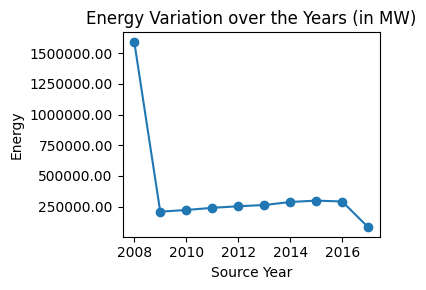

In [ ]:
plt.figure(figsize=(4, 3))
plt.plot(data3['YearCode'], data3['Actual energy generated(MW)'], marker='o', linestyle='-')




# Add labels and title
plt.xlabel('Source Year')
plt.ylabel('Energy')
plt.title('Energy Variation over the Years (in MW)')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))

plt.tight_layout()
plt.show()

In [ ]:
data2[['Month', 'Year']] = data2['SourceMonth'].str.split(' - ', expand=True)


data2['Year'] = pd.to_numeric(data2['Year'])


df_sorted = data2.sort_values(by=['Year', 'Month'])


df_sorted = df_sorted.drop(columns=['Month', 'Year'])

In [ ]:
df_sorted.head()

SourceMonth  Actual energy generated(MW)
0   Apr - 2008                 1.462883e+06
9   Aug - 2008                 1.619785e+04
18  Dec - 2008                 1.656804e+04
45  Jul - 2008                 1.653746e+04
54  Jun - 2008                 1.596190e+04

In [ ]:
df_sorted=df_sorted.drop(0,axis=0)

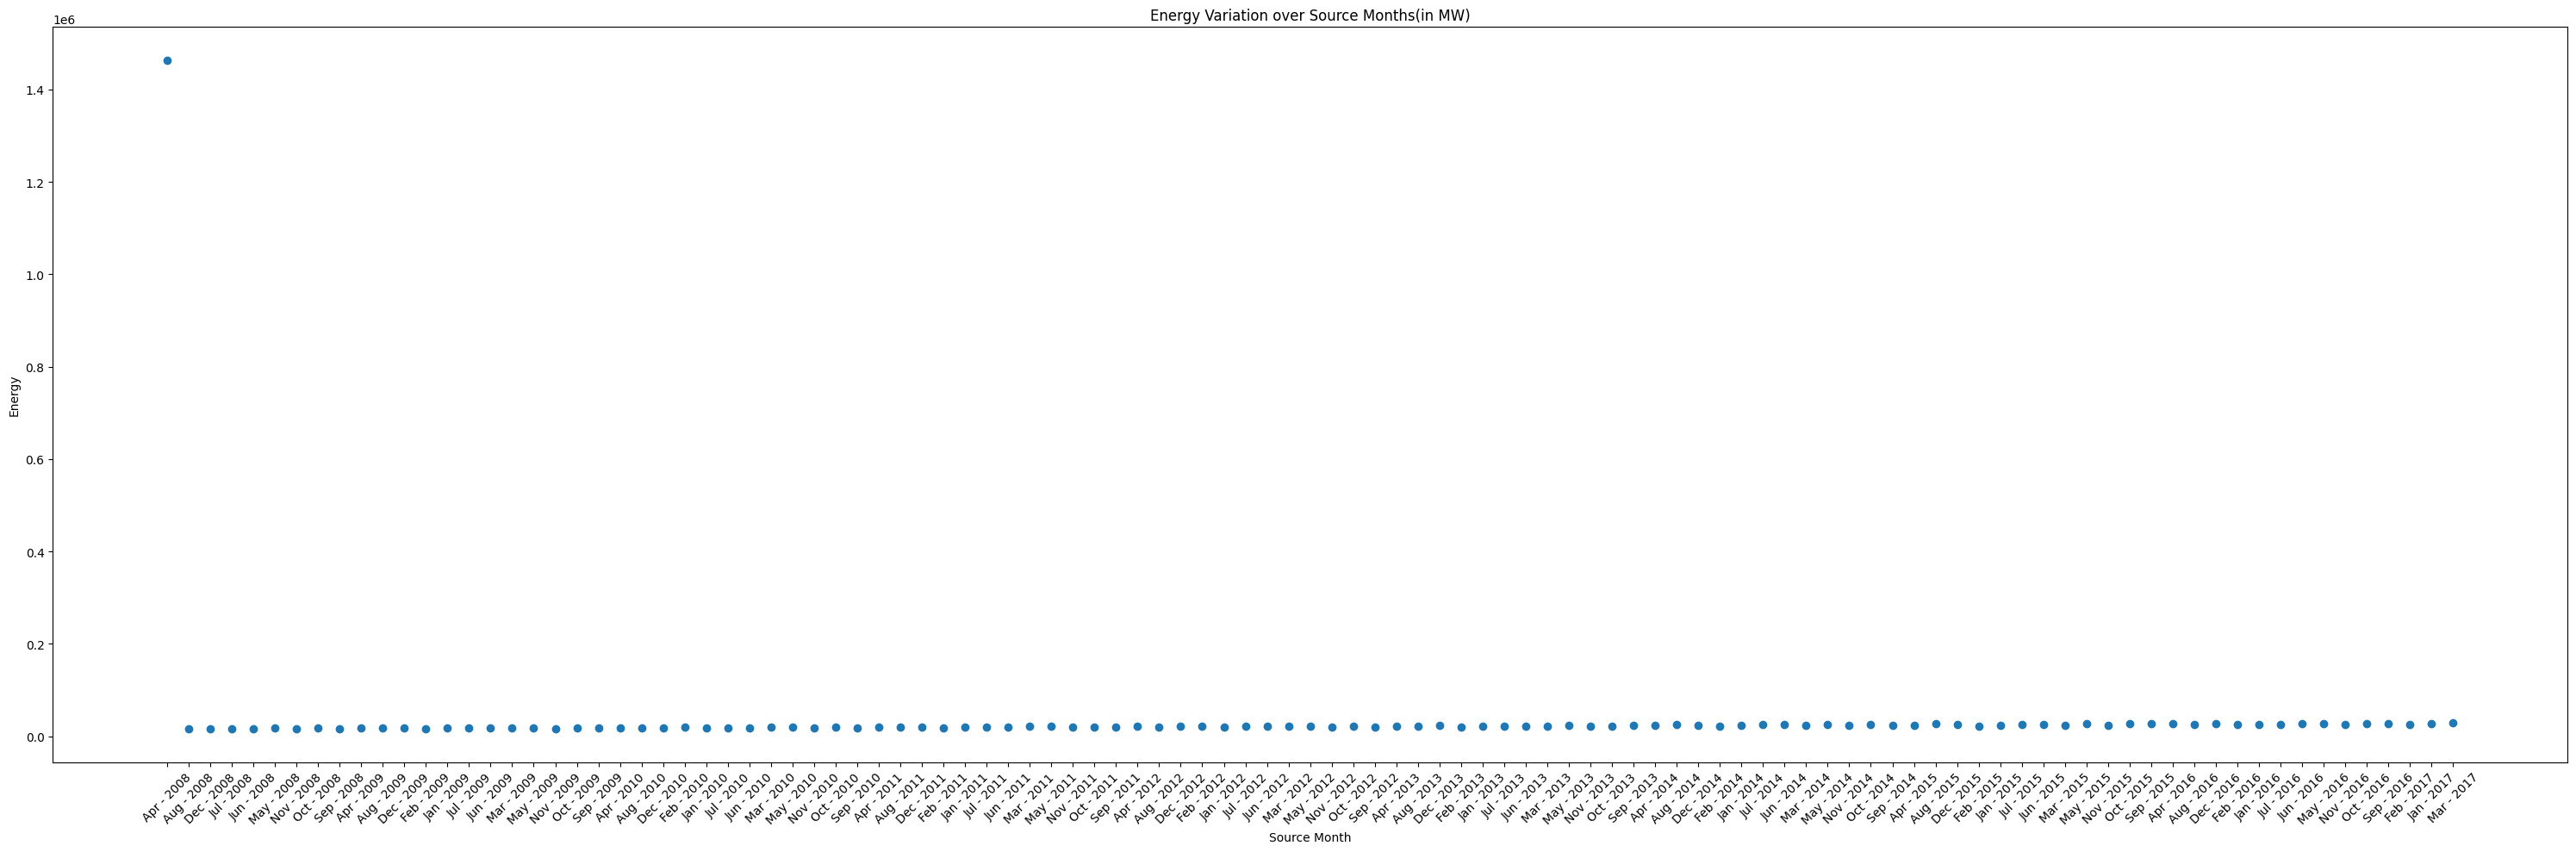

In [ ]:
plt.figure(figsize=(30, 10))
plt.plot(df_sorted['SourceMonth'], df_sorted['Actual energy generated(MW)'], marker='o', linestyle='')



# Add labels and title
plt.xlabel('Source Month')
plt.ylabel('Energy')
plt.title('Energy Variation over Source Months(in MW)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## (b) Regional Variation

In [ ]:
data4 = df2.groupby('State')['Actual energy generated(MW)'].sum().reset_index()
data5 = df2.groupby('Region')['Actual energy generated(MW)'].sum().reset_index()

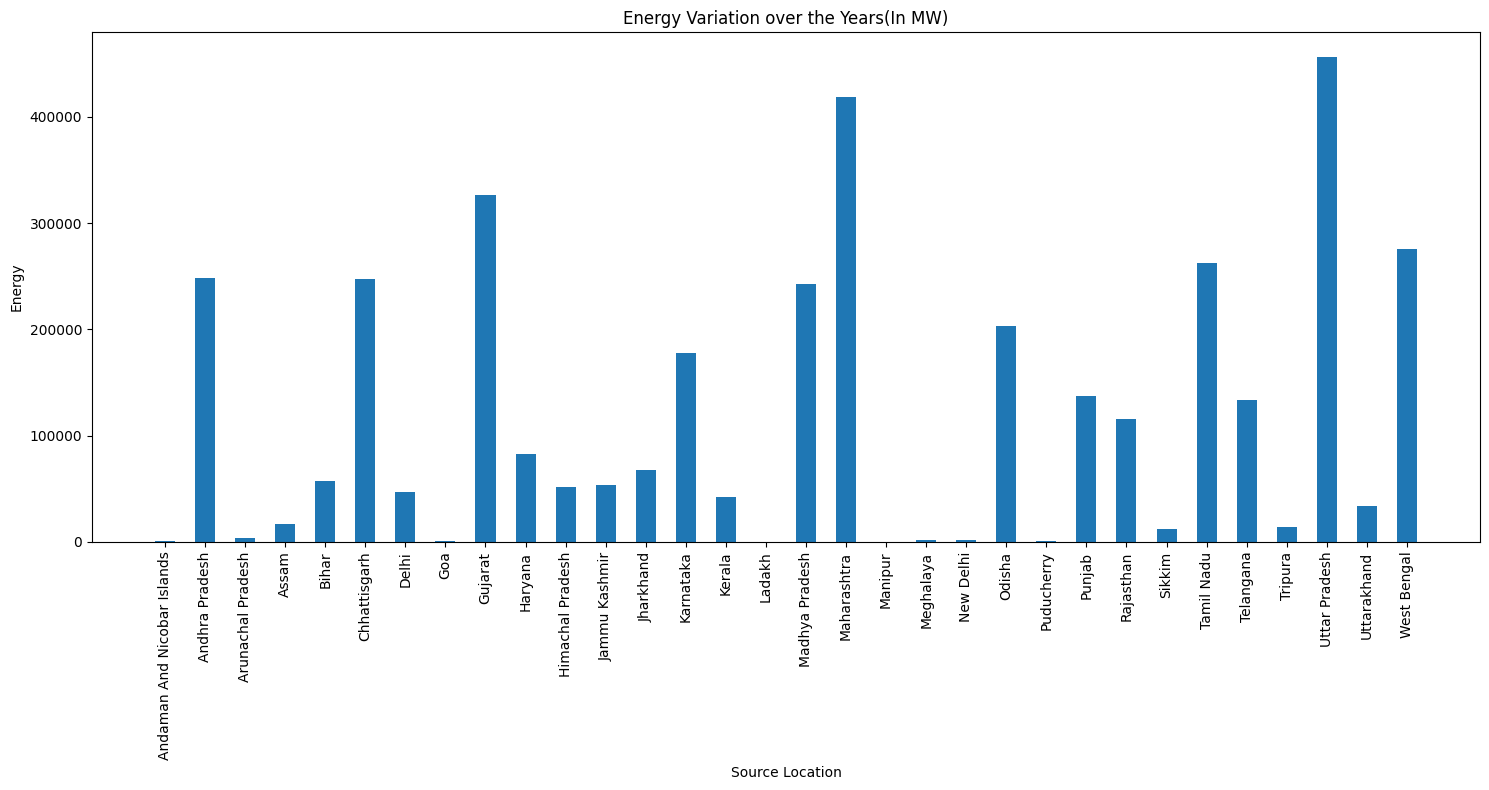

In [ ]:
plt.figure(figsize=(15, 8))
plt.bar(data4['State'], data4['Actual energy generated(MW)'], width=0.5)




# Add labels and title
plt.xlabel('Source Location')
plt.ylabel('Energy')
plt.xticks(rotation=90)
plt.title('Energy Variation over the Years(In MW)')
# plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))
plt.tight_layout()
plt.show()

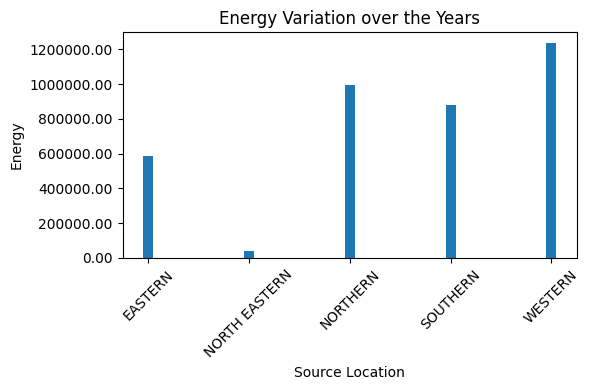

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(data5['Region'], data5['Actual energy generated(MW)'], width=0.1)


plt.xlabel('Source Location')
plt.ylabel('Energy')
plt.title('Energy Variation over the Years')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## (c) Analysis of Impossible Scenarios where plant is operating at above capacity

In [ ]:
data8=df2[['Actual energy generated(MW)','Installed Capacity','YearCode','SourceMonth','State']]

In [ ]:
data8['Difference']=data8['Installed Capacity']-data8['Actual energy generated(MW)']


<ipython-input-159-f13511ad3597>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data8['Difference']=data8['Installed Capacity']-data8['Actual energy generated(MW)']


In [ ]:
danger=data8[data8.Difference<0].value_counts()
Good=data8[data8.Difference==0].value_counts()
Improve=data8[data8.Difference>0].value_counts()

603


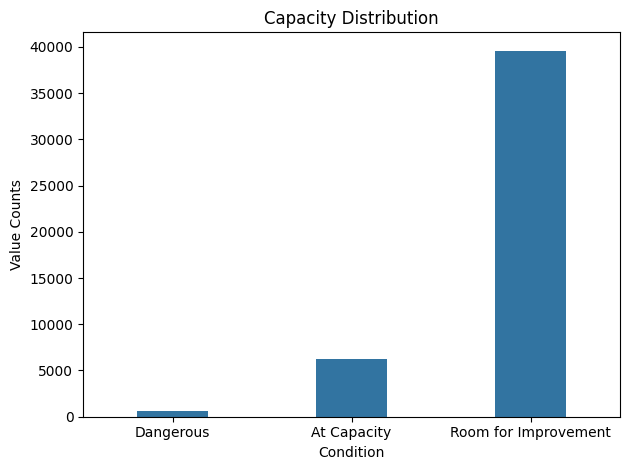

In [ ]:
danger_sum=danger.sum()
Good_sum=Good.sum()
Improve_sum=Improve.sum()
print(danger_sum)




data1_df2 = pd.DataFrame({
    'Condition': ['Dangerous', 'At Capacity', 'Room for Improvement'],
    'Count': [danger_sum,Good_sum,Improve_sum]
})





# Plotting
fig= figsize=(4, 3)


sns.barplot(x='Condition', y='Count',data=data1_df2, width=0.4)
plt.title('Capacity Distribution')
plt.xlabel('Condition')
plt.ylabel('Value Counts')

plt.tight_layout()
plt.show()

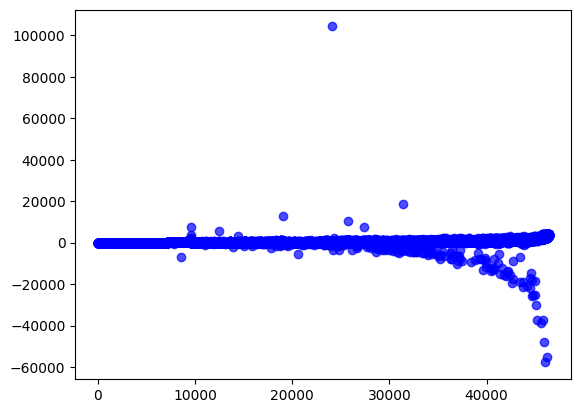

In [ ]:

plt.scatter(range(len(data8)), data8['Difference'], marker='o', color='blue', alpha=0.7)
plt.show() #Looks close to zero due to the scale which occurs due to many anomalies

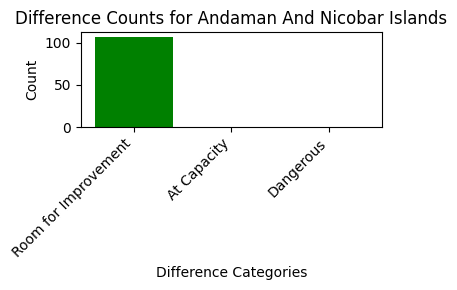

[107, 0, 0]


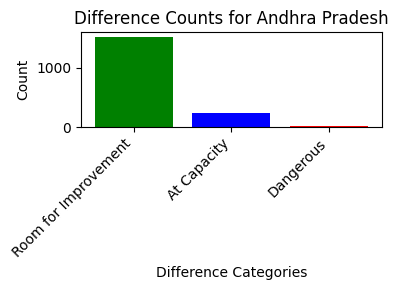

[1521, 237, 15]


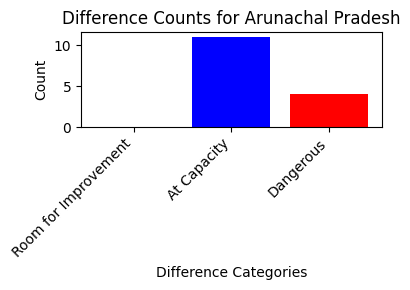

[0, 11, 4]


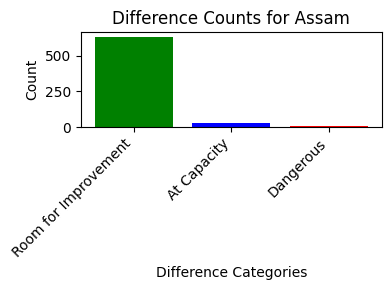

[633, 27, 6]


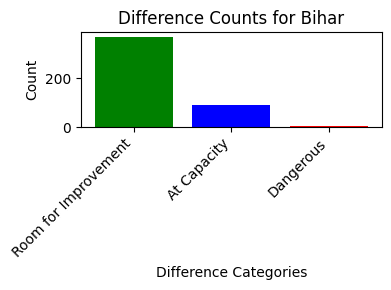

[368, 91, 3]


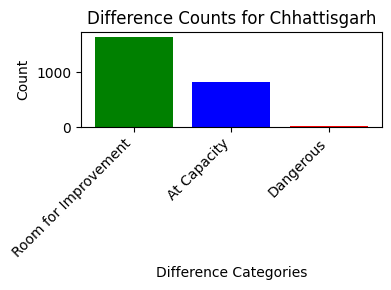

[1641, 811, 11]


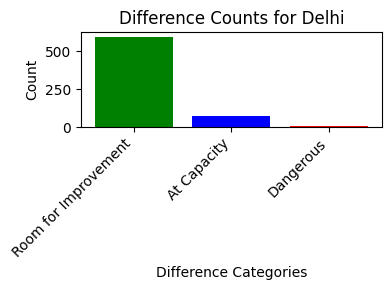

[595, 76, 7]


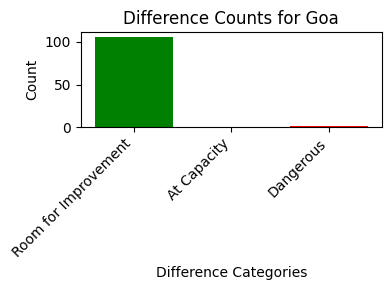

[106, 0, 1]


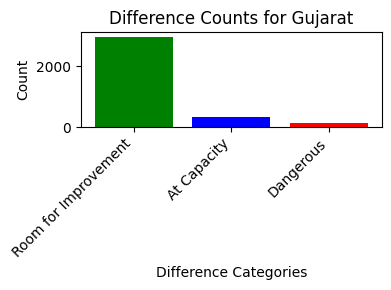

[2977, 318, 132]


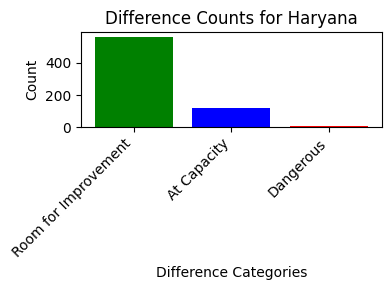

[563, 121, 6]


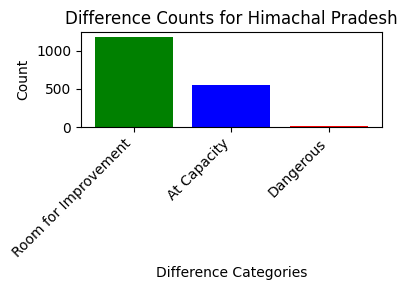

[1181, 553, 8]


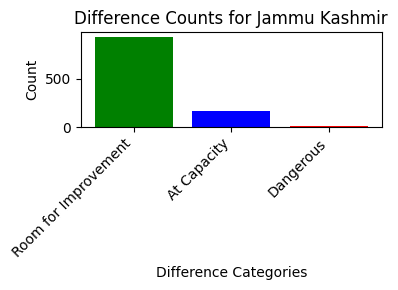

[930, 167, 6]


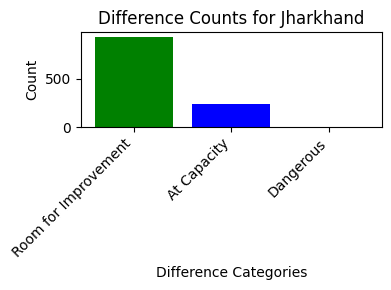

[937, 237, 4]


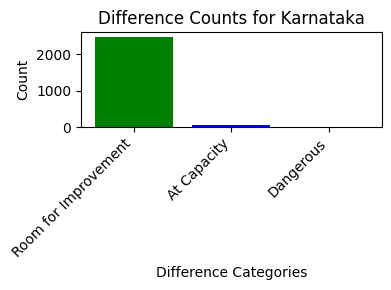

[2472, 55, 12]


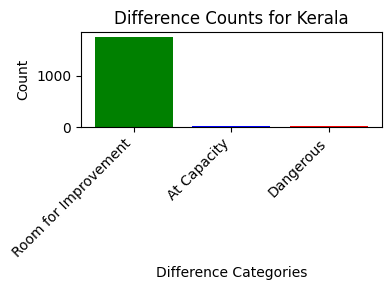

[1764, 25, 12]


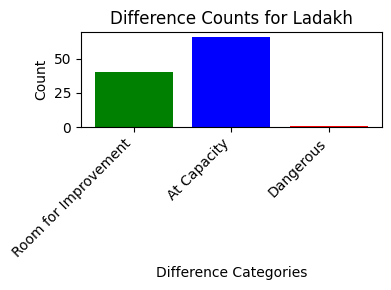

[40, 66, 1]


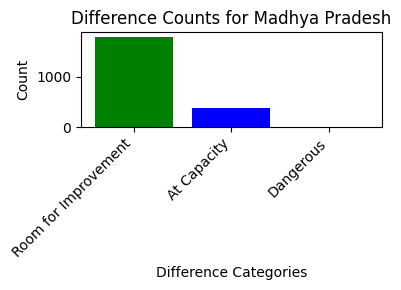

[1793, 384, 11]


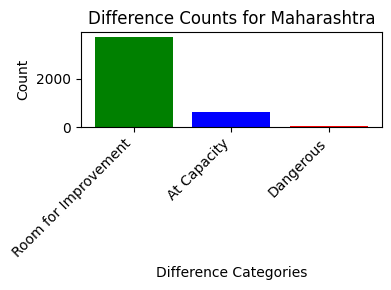

[3725, 625, 25]


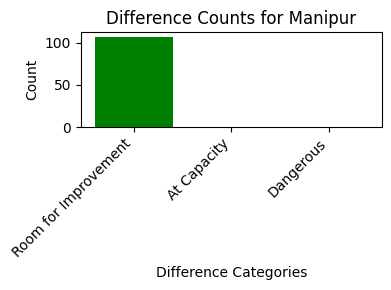

[107, 0, 0]


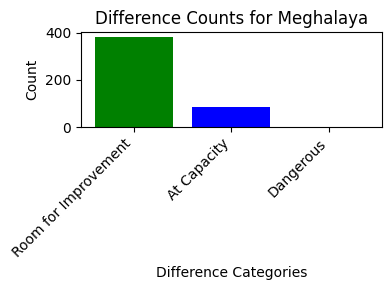

[382, 84, 2]


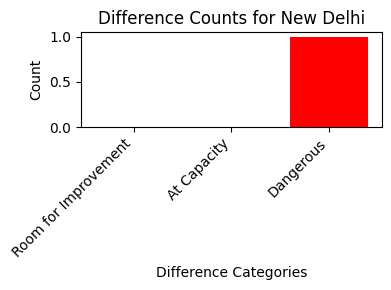

[0, 0, 1]


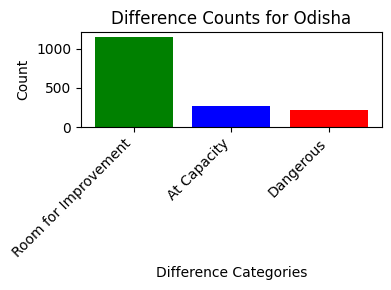

[1153, 269, 221]


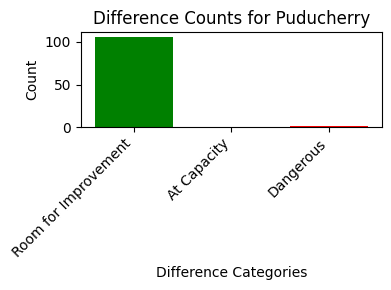

[106, 0, 1]


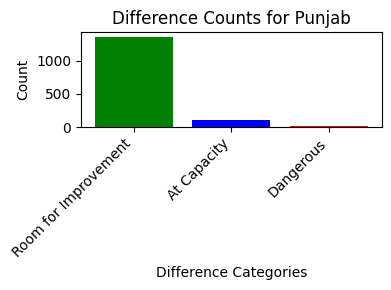

[1360, 102, 9]


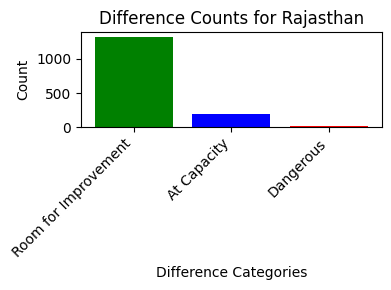

[1325, 195, 12]


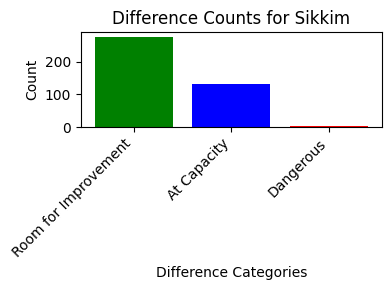

[277, 133, 2]


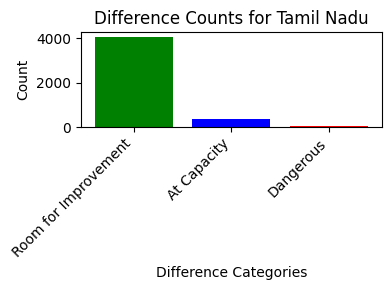

[4071, 369, 27]


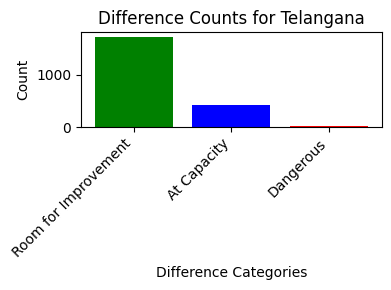

[1721, 417, 11]


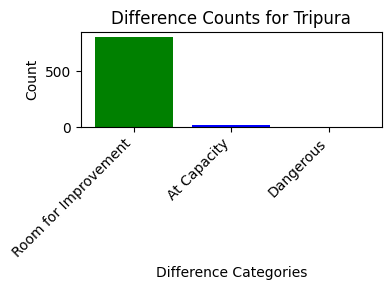

[808, 17, 2]


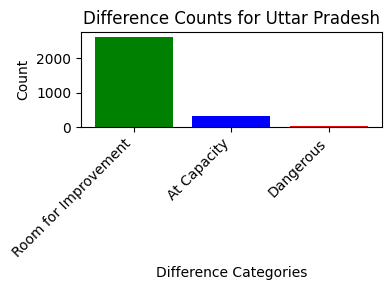

[2620, 312, 20]


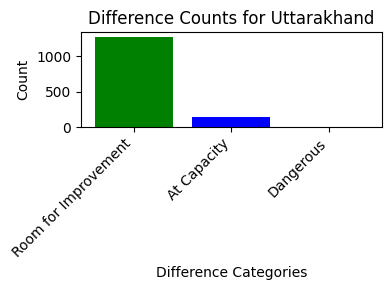

[1277, 142, 8]


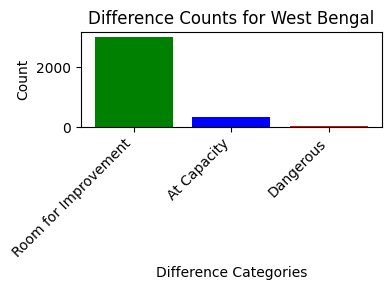

[3027, 352, 23]


In [ ]:


data8 = pd.DataFrame({
    'State': data8.State,
    'Difference': data8.Difference
})

# Group by 'State' and 'Difference', then count occurrences
plant_counts = data8.groupby(['State', 'Difference']).size().unstack(fill_value=0)


for state in plant_counts.index:
    categories = ['Room for Improvement', 'At Capacity', 'Dangerous']
    counts = [
        plant_counts.loc[state][plant_counts.columns > 0].sum(),
        plant_counts.loc[state][plant_counts.columns == 0].sum(),
        plant_counts.loc[state][plant_counts.columns < 0].sum()
    ]

    plt.figure(figsize=(4, 3))
    plt.bar(categories, counts, color=['green', 'blue', 'red'])


    plt.xlabel('Difference Categories')
    plt.ylabel('Count')
    plt.title(f'Difference Counts for {state}')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()
    print(counts)

## (d) Coal Company Analysis

In [ ]:
data9=df2.copy()
data9 = data9.drop(data9[data9['Installed Capacity'] - data9['Actual energy generated(MW)'] < 0].index)

In [ ]:
df2['Name of coal company'].value_counts()

Name of coal company
TNGDCL              2889
NTPC Ltd.           2622
NHPC                2045
APGENCO             1996
KPCL                1888
                    ... 
TOR POW (SUGEN)        1
JK PDDHPCL             1
P&ED  Puducherry       1
EPPL                   1
JK  PDDHPCL            1
Name: count, Length: 204, dtype: int64

In [ ]:
data9.shape

(45783, 21)

In [ ]:
data10=df2.copy()

In [ ]:
data11=data9.groupby('Name of coal company')['Actual energy generated(MW)'].sum().reset_index()
data12=data10.groupby('Name of coal company')['Actual energy generated(MW)'].sum().reset_index()

In [ ]:
data13=data11.copy()

In [ ]:
# data13=data13[data13['Name of coal company']!='NTPC Ltd.']


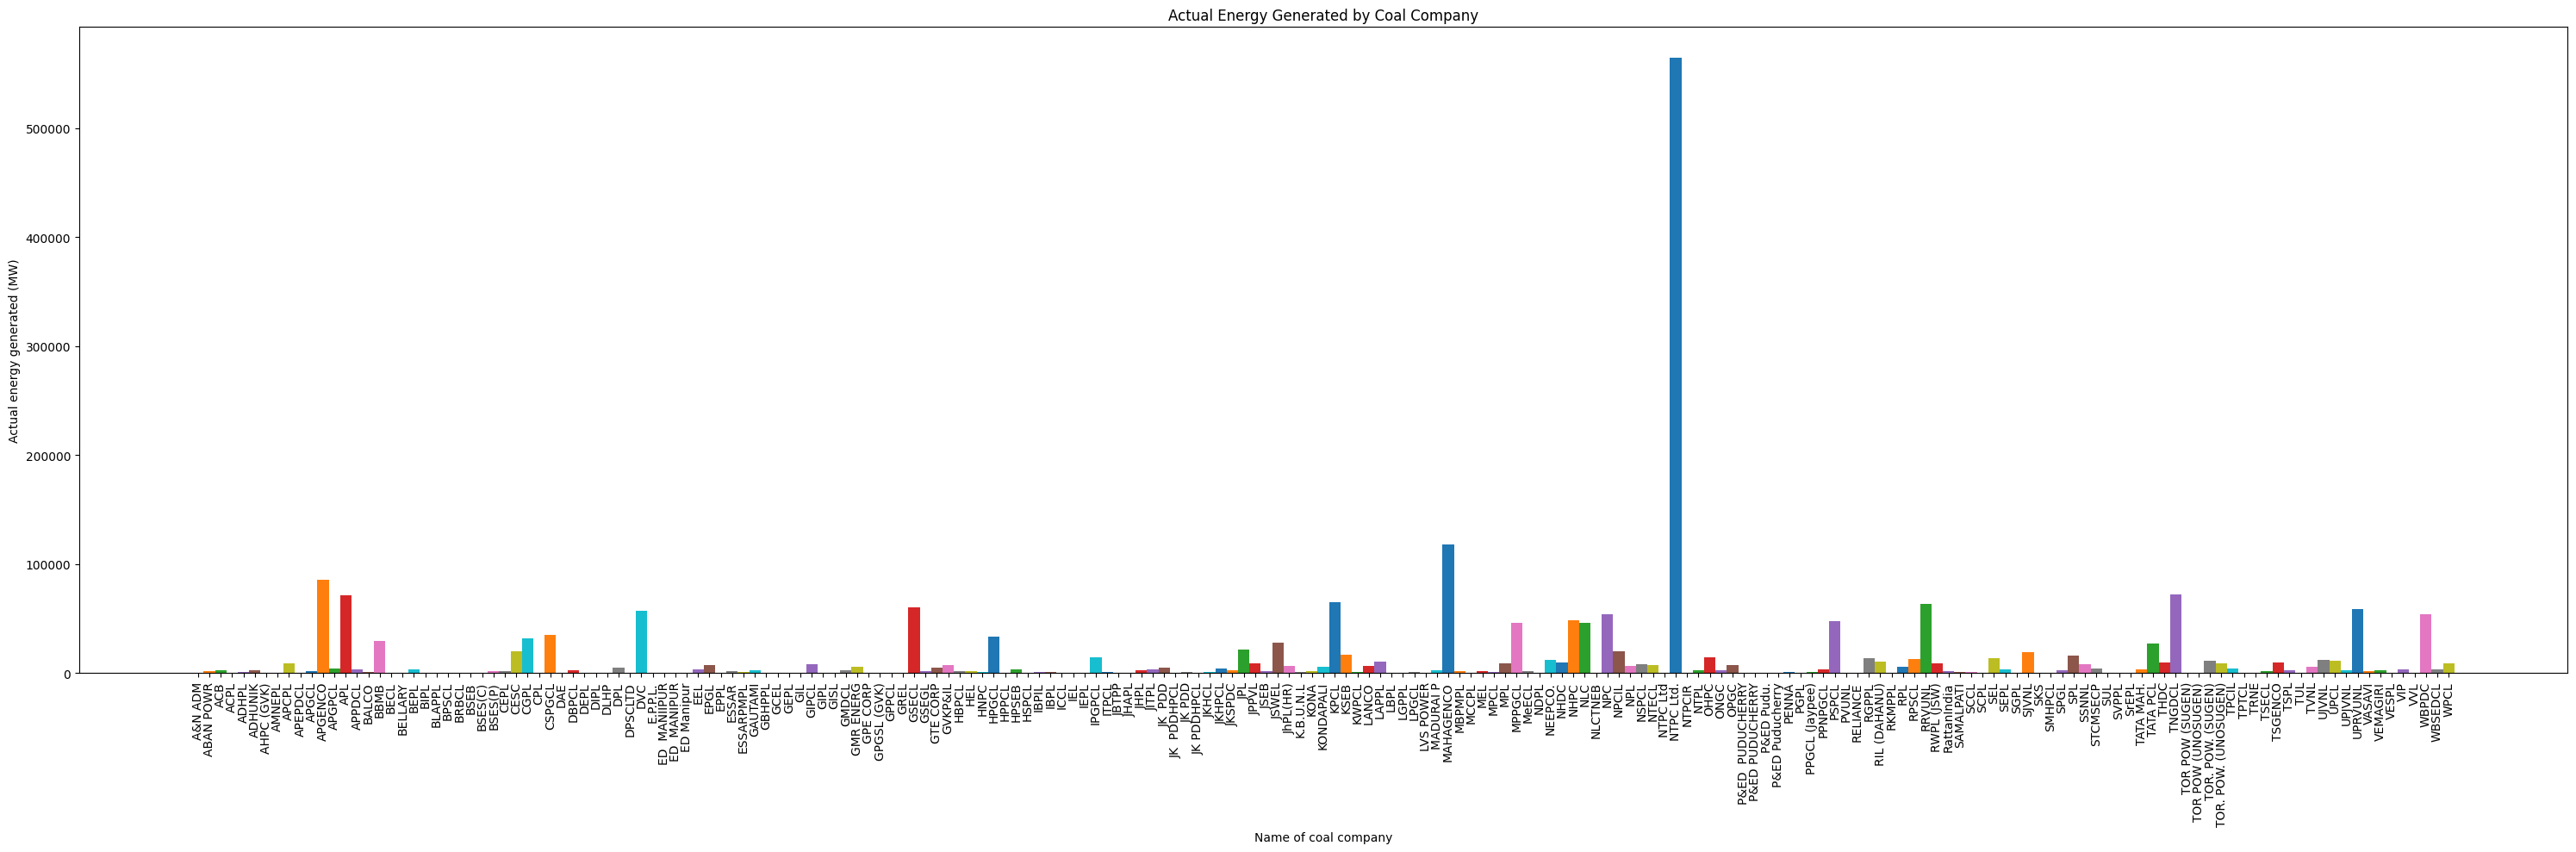

In [ ]:
plt.figure(figsize=(30, 10))

# Iterate over each row in the DataFrame
for index, row in data11.iterrows():
    plt.bar([row['Name of coal company']], [row['Actual energy generated(MW)']], width=1)
plt.xlabel('Name of coal company')
plt.ylabel('Actual energy generated (MW)')
plt.title('Actual Energy Generated by Coal Company')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

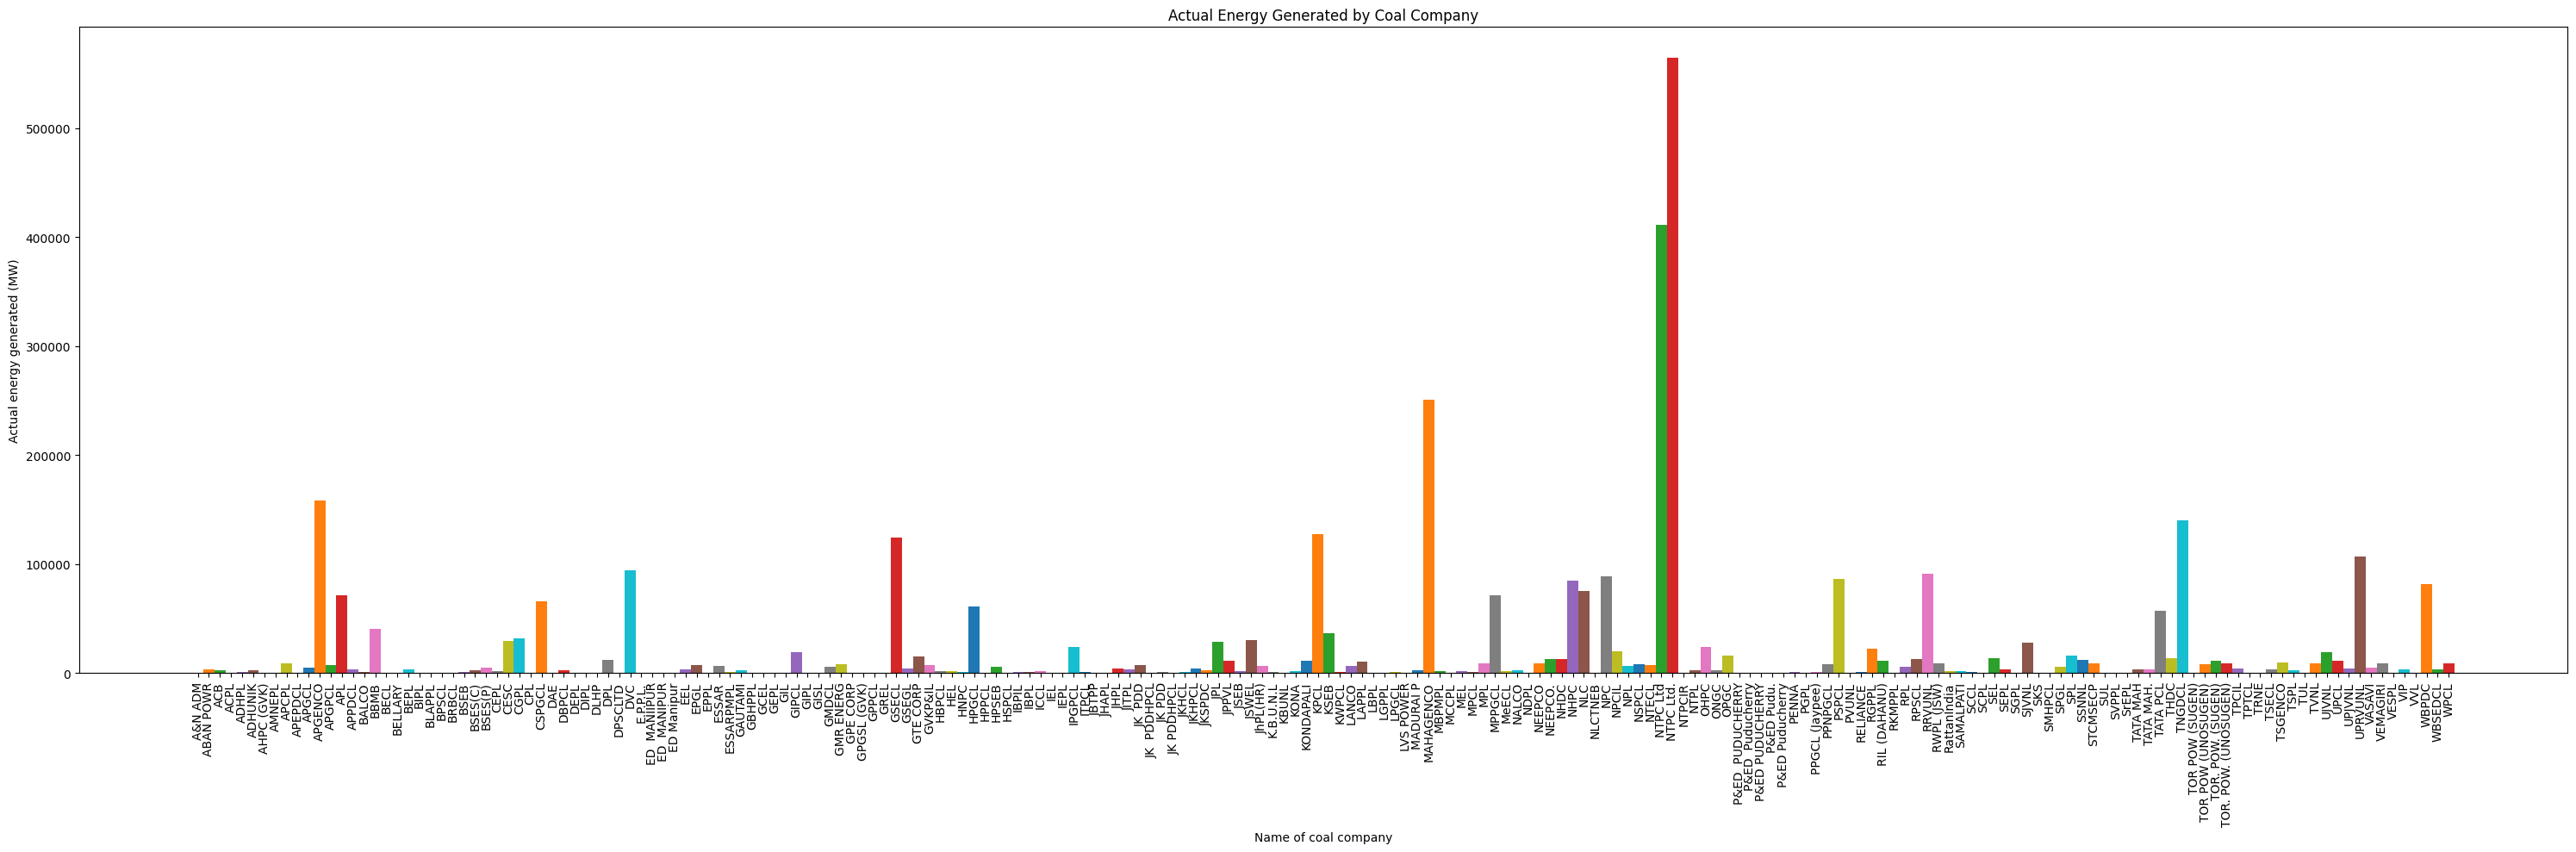

In [ ]:
plt.figure(figsize=(30, 10))

# Iterate over each row in the DataFrame
for index, row in data12.iterrows():
    plt.bar([row['Name of coal company']], [row['Actual energy generated(MW)']], width=1)
plt.xlabel('Name of coal company')
plt.ylabel('Actual energy generated (MW)')
plt.title('Actual Energy Generated by Coal Company')
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

In [ ]:
merged_data = pd.merge(data12, data11, on='Name of coal company', suffixes=('_data12', '_data11'))

# Calculate the difference only when names match
merged_data['Difference'] = merged_data['Actual energy generated(MW)_data12'] - merged_data['Actual energy generated(MW)_data11']

A&N ADM   0.0
ABAN POWR   1991.111111111111
ACB   0.0
ACPL   0.0
ADHPL   10.547222222222445
ADHUNIK   0.0
AHPC (GVK)   0.0
AMNEPL   0.0
APCPL   0.0
APEPDCL   0.0
APGCL   3768.8888888888887
APGENCO   72576.125
APGPCL   2836.666666666666
APL   10.283333333340124
APPDCL   0.0
BALCO   0.0
BBMB   11269.444444444442
BECL   0.0
BELLARY   280.0
BEPL   0.0
BIPL   0.0
BLAPPL   0.0
BPSCL   0.0
BRBCL   0.0
BSEB   857.7777777777778
BSES(C)   1654.7222222222222
BSES(P)   2803.333333333333
CEPL   0.0
CESC   9762.5
CGPL   0.0
CPL   0.0
CSPGCL   30528.333333333336
DAE   0.0
DBPCL   0.0
DEPL   0.0
DIPL   0.0
DLHP   0.0
DPL   7184.166666666667
DPSCLTD   346.1111111111111
DVC   37257.222222222226
E.P.P.L.   0.0
ED  MANIIPUR   0.0
ED  MANIPUR   0.0
ED Manipur   0.0
EEL   0.0
EPGL   0.0
EPPL   0.0
ESSAR   4794.166666666666
ESSARPMPL   0.0
GAUTAMI   14.119444444444525
GBHPPL   0.0
GCEL   0.0
GEPL   0.0
GIL   0.0
GIPCL   10828.177777777779
GIPL   0.0
GISL   0.0
GMDCL   2574.7222222222226
GMR ENERG   2025.5555

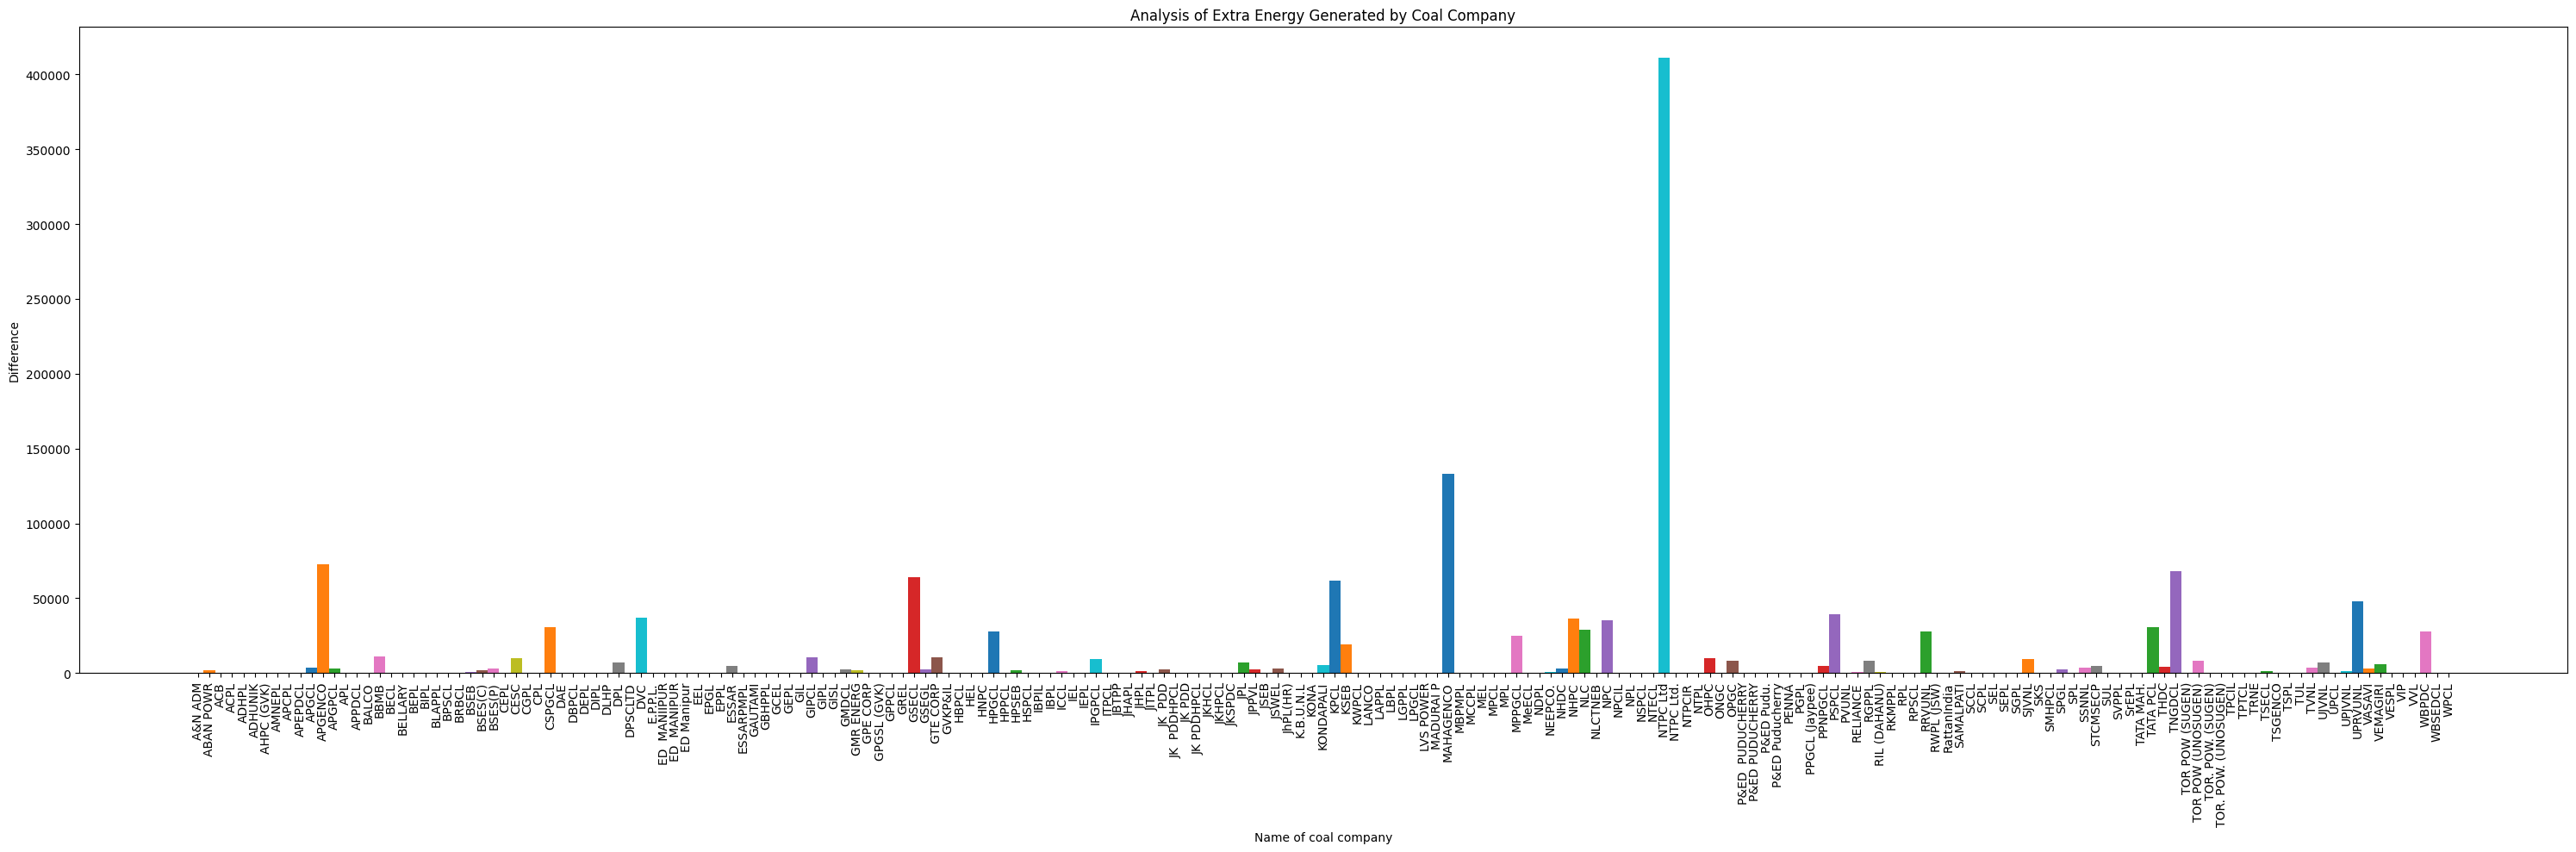

In [ ]:
plt.figure(figsize=(30, 10))

# Iterate over each row in the DataFrame
for index, row in merged_data.iterrows():
    plt.bar([row['Name of coal company']], [row['Difference']], width=1)
    print(row['Name of coal company'], " " , row['Difference'])
plt.xlabel('Name of coal company')
plt.ylabel('Difference')
plt.title('Analysis of Extra Energy Generated by Coal Company')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


## (e) Plant Type and Fuel

In [ ]:
df3=df2.copy()

First two cells are for all plants. New two plots are for plants operating within capacity

In [ ]:
# thermal_plants = df3[df3['Category of Plant'] == 'THERMAL']

# # Group by 'Plant' and get value counts of 'Type of fuel used' for Thermal Power Plants
# thermal_fuel_counts = thermal_plants.groupby('Category of Plant')['Type of fuel used'].value_counts()

# # Print the results
# # print("Fuel usage in Thermal Power Plants:")
# print(thermal_fuel_counts)


# # Filter for Nuclear Power Plants
# nuclear_plants = df3[df3['Category of Plant'] == 'NUCLEAR']

# # Group by 'Plant' and get value counts of 'Type of fuel used' for Nuclear Power Plants
# nuclear_fuel_counts = nuclear_plants.groupby('Category of Plant')['Type of fuel used'].value_counts()

# print(nuclear_fuel_counts)
# nuclear_plants = df3[df3['Category of Plant'] == 'HYDRO']


# HYDRO_fuel_counts = nuclear_plants.groupby('Category of Plant')['Type of fuel used'].value_counts()


# print(HYDRO_fuel_counts)

Category of Plant  Type of fuel used
THERMAL            COAL                 17268
                   GAS                   4795
                   NATURAL GAS           1186
                   DIESEL                1177
                   LIGNITE                979
                   NAPTHA                 445
                   HIGH SPEED DIESEL      267
                   MULTI FUEL             137
                   THERMAL                 20
Name: count, dtype: int64
Category of Plant  Type of fuel used
NUCLEAR            NUCLEAR              783
Name: count, dtype: int64
Category of Plant  Type of fuel used
HYDRO              HYDRO                19329
Name: count, dtype: int64


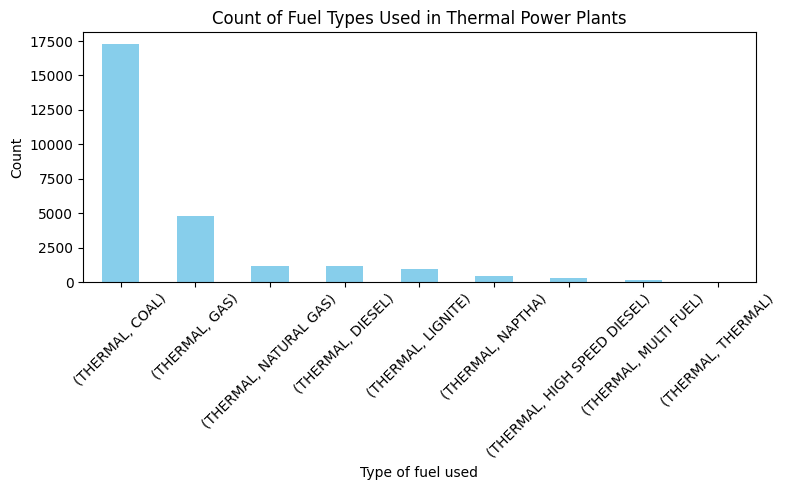

In [ ]:
# plt.figure(figsize=(8, 5))
# thermal_fuel_counts.plot(kind='bar', color='skyblue')

# # Add labels and title
# plt.xlabel('Type of fuel used')
# plt.ylabel('Count')
# plt.title('Count of Fuel Types Used in Thermal Power Plants')

# # Show plot
# plt.xticks(rotation=45)  # Rotate x-axis labels if needed
# plt.tight_layout()
# plt.show()

In [ ]:
thermal_plants = data9[data9['Category of Plant'] == 'THERMAL']


thermal_fuel_counts = thermal_plants.groupby('Category of Plant')['Type of fuel used'].value_counts()


print(thermal_fuel_counts)



nuclear_plants = data9[data9['Category of Plant'] == 'NUCLEAR']

nuclear_fuel_counts = nuclear_plants.groupby('Category of Plant')['Type of fuel used'].value_counts()

print(nuclear_fuel_counts)
nuclear_plants = data9[data9['Category of Plant'] == 'HYDRO']


HYDRO_fuel_counts = nuclear_plants.groupby('Category of Plant')['Type of fuel used'].value_counts()


print(HYDRO_fuel_counts)

Category of Plant  Type of fuel used
THERMAL            COAL                 16961
                   GAS                   4657
                   DIESEL                1174
                   NATURAL GAS           1168
                   LIGNITE                968
                   NAPTHA                 442
                   HIGH SPEED DIESEL      267
                   MULTI FUEL             136
                   THERMAL                 20
Name: count, dtype: int64
Category of Plant  Type of fuel used
NUCLEAR            NUCLEAR              777
Name: count, dtype: int64
Category of Plant  Type of fuel used
HYDRO              HYDRO                19213
Name: count, dtype: int64


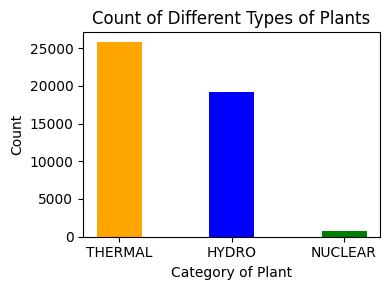

In [ ]:
thermal_plants_count = data9[data9['Category of Plant'] == 'THERMAL'].shape[0]
hydro_plants_count = data9[data9['Category of Plant'] == 'HYDRO'].shape[0]
nuclear_plants_count = data9[data9['Category of Plant'] == 'NUCLEAR'].shape[0]

# Prepare data for plotting
categories = ['THERMAL', 'HYDRO', 'NUCLEAR']
counts = [thermal_plants_count, hydro_plants_count, nuclear_plants_count]

# Plot bar chart
plt.figure(figsize=(4, 3))
plt.bar(categories, counts, color=['orange', 'blue', 'green'],width=0.4)

# Add labels and title
plt.xlabel('Category of Plant')
plt.ylabel('Count')
plt.title('Count of Different Types of Plants')
# plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

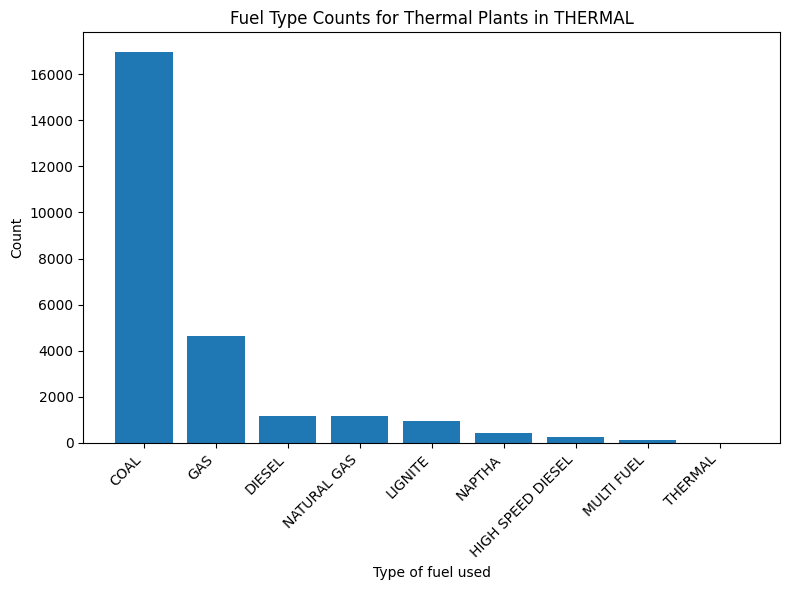

In [ ]:
for state in thermal_fuel_counts.index.levels[0]:
    categories = thermal_fuel_counts[state].index
    counts = thermal_fuel_counts[state].values

    # Plot bar chart
    plt.figure(figsize=(8, 6))
    plt.bar(categories, counts)

    # Add labels and title
    plt.xlabel('Type of fuel used')
    plt.ylabel('Count')
    plt.title(f'Fuel Type Counts for Thermal Plants in {state}')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

In [ ]:
df_NTPC=df2[df2['Name of coal company']=='NTPC Ltd.']
df_NTPC_2=df2[df2['Name of coal company']=='NTPC Ltd.']



In [ ]:
df_NTPC['Difference']=df_NTPC['Installed Capacity']-df_NTPC['Actual energy generated(MW)']
df_NTPC_2['Difference']=df_NTPC_2['Installed Capacity']-df_NTPC_2['Actual energy generated(MW)']

<ipython-input-183-9e4998d83210>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NTPC['Difference']=df_NTPC['Installed Capacity']-df_NTPC['Actual energy generated(MW)']
<ipython-input-183-9e4998d83210>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NTPC_2['Difference']=df_NTPC_2['Installed Capacity']-df_NTPC_2['Actual energy generated(MW)']


In [ ]:
df_NTPC_2.Difference.unique()

array([   0.        ,  499.38888889,  500.        , ..., 3939.43055556,
       3837.41388889, 4111.79166667])

## (f)##How do the fuel type and Plant category vary with Location

In [ ]:
hydro_plants = data9[data9['Category of Plant'] == 'HYDRO']

# Group by 'Plant' and get value counts of 'Type of fuel used' for Thermal Power Plants
fuel_counts = hydro_plants.groupby('State')['Type of fuel used'].value_counts()


thermal_plants = data9[data9['Category of Plant'] == 'THERMAL']

# Group by 'Plant' and get value counts of 'Type of fuel used' for Thermal Power Plants
fuel_counts_3 = thermal_plants.groupby('State')['Type of fuel used'].value_counts()


hydro_plants = data9[data9['Category of Plant'] == 'NUCLEAR']

# Group by 'Plant' and get value counts of 'Type of fuel used' for Thermal Power Plants
fuel_counts_2 = hydro_plants.groupby('State')['Type of fuel used'].value_counts()



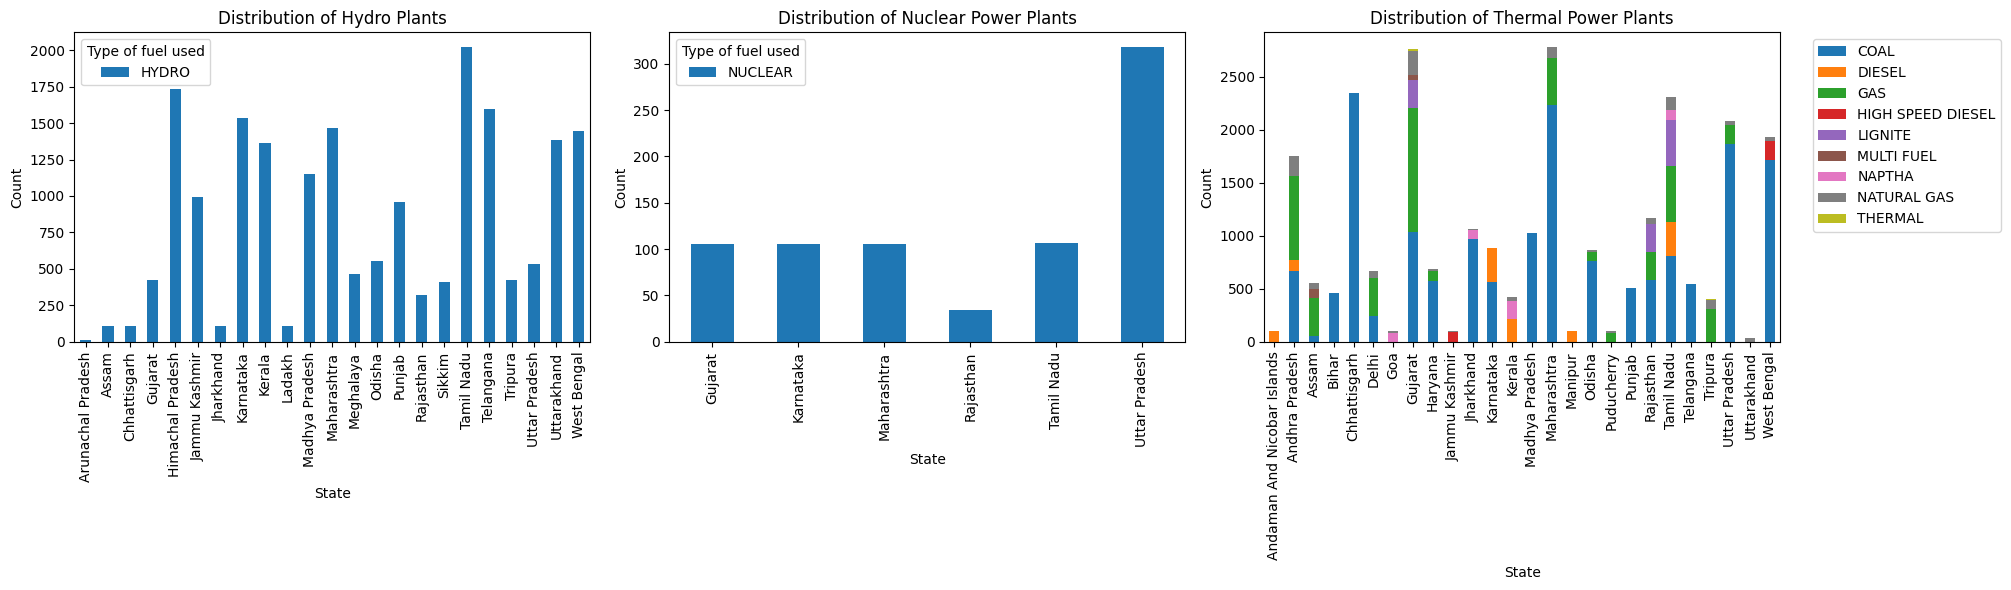

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Adjusted figsize for better visualization

# Plot for Nuclear Plants
fuel_counts.unstack().plot(kind='bar', ax=axs[0], stacked=True)
axs[0].set_title('Distribution of Hydro Plants')
axs[0].set_xlabel('State')
axs[0].set_ylabel('Count')

# Plot for Hydro Plants
fuel_counts_2.unstack().plot(kind='bar', ax=axs[1], stacked=True)
axs[1].set_title('Distribution of Nuclear Power Plants')
axs[1].set_xlabel('State')
axs[1].set_ylabel('Count')

# Plot for Thermal Plants
fuel_counts_3.unstack().plot(kind='bar', ax=axs[2], stacked=True)
axs[2].set_title('Distribution of Thermal Power Plants')
axs[2].set_xlabel('State')
axs[2].set_ylabel('Count')

# Adjust layout and legend position
plt.tight_layout()

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [ ]:
df3['Category']=df3['Category of Plant']

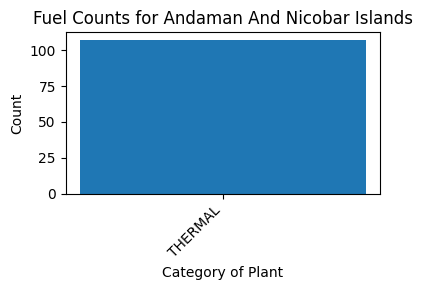

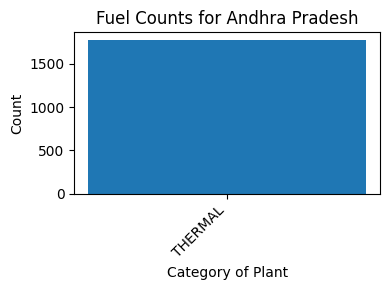

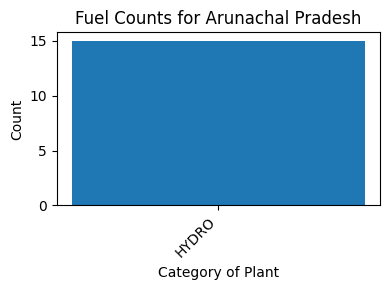

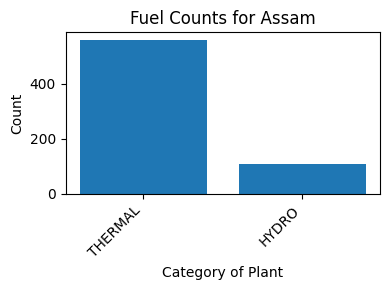

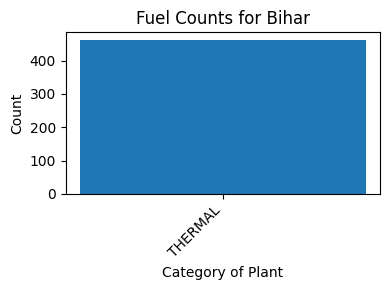

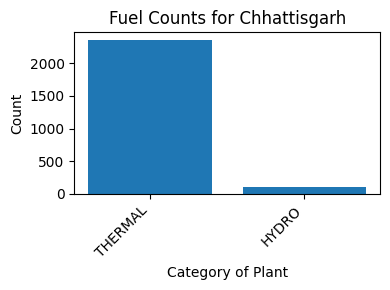

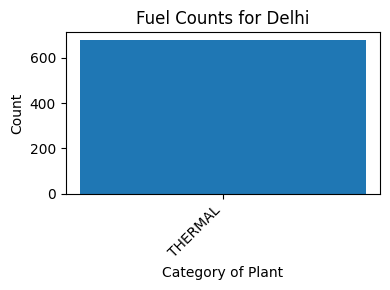

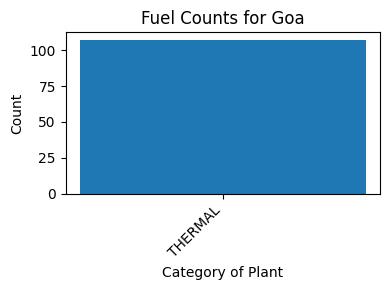

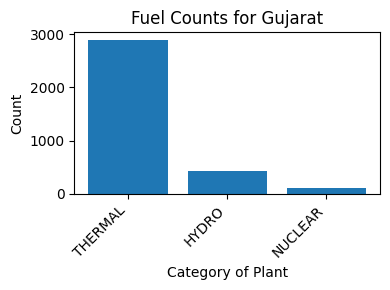

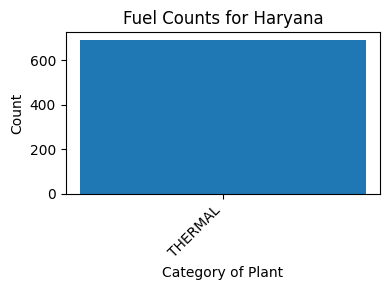

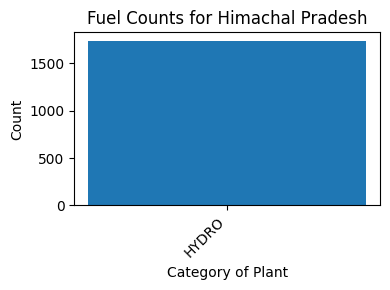

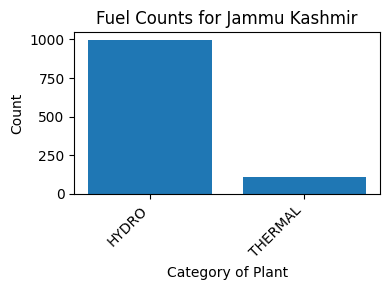

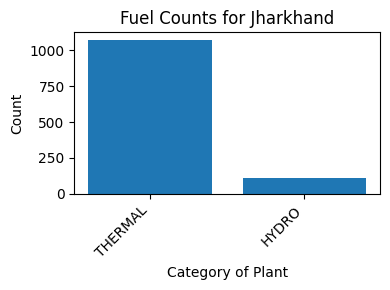

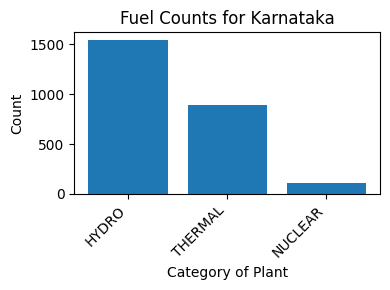

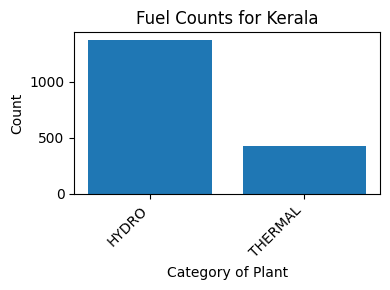

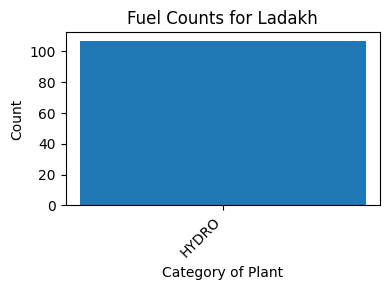

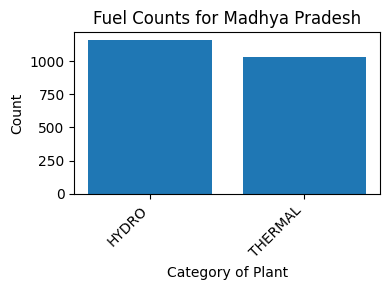

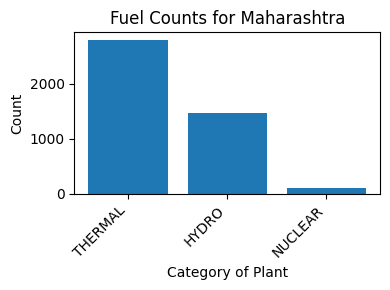

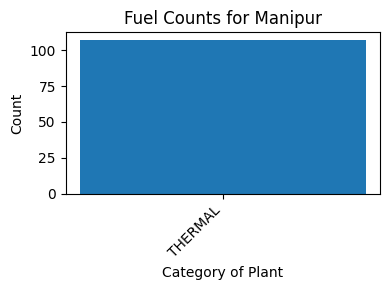

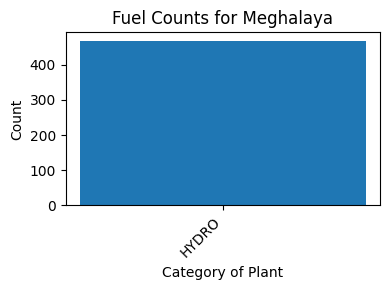

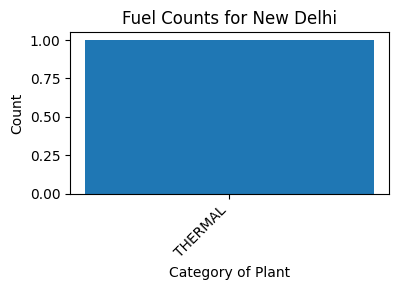

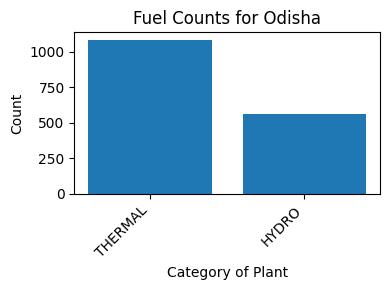

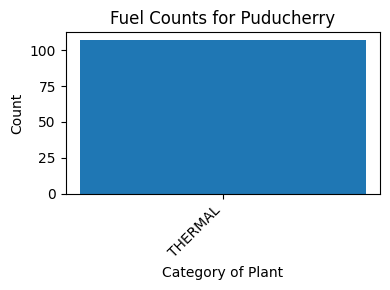

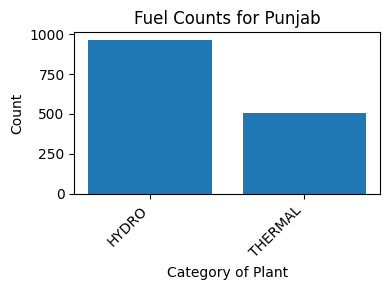

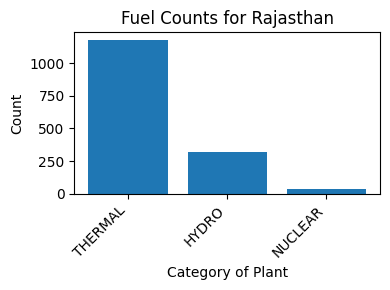

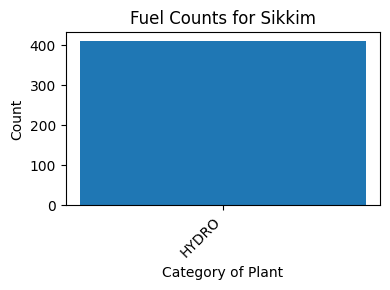

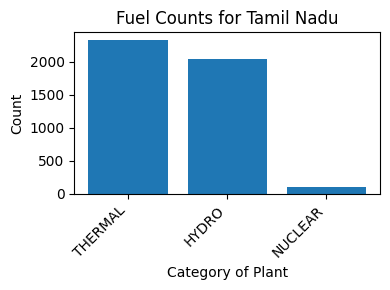

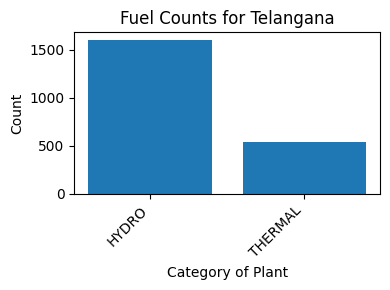

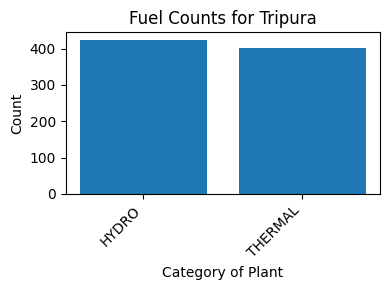

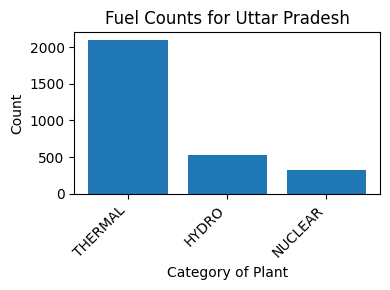

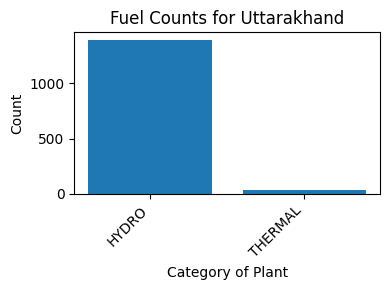

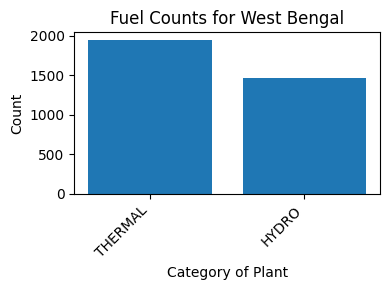

In [ ]:


plant_counts = df3.groupby('State')['Category of Plant'].value_counts()

# Plotting for each state
for state in plant_counts.index.levels[0]:
    categories = plant_counts[state].index
    counts = plant_counts[state].values


    plt.figure(figsize=(4, 3))
    plt.bar(categories, counts)

    plt.xlabel('Category of Plant')
    plt.ylabel('Count')
    plt.title(f'Fuel Counts for {state}')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()


In [ ]:
hydro_plants = data9[data9['Category of Plant'] == 'THERMAL']

fuel_counts_3= hydro_plants.groupby('State')['Type of fuel used'].value_counts()

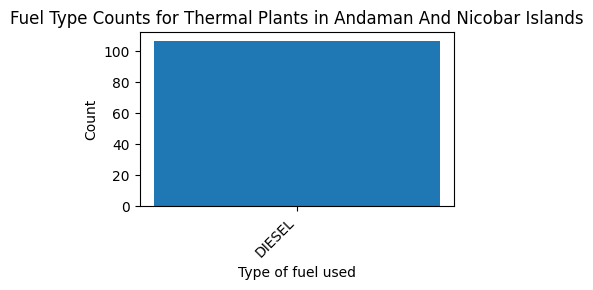

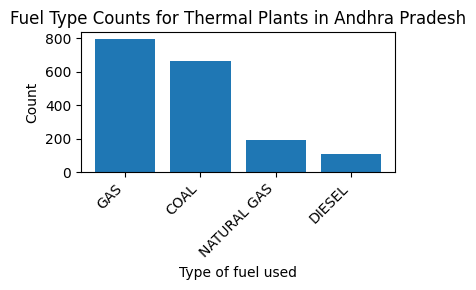

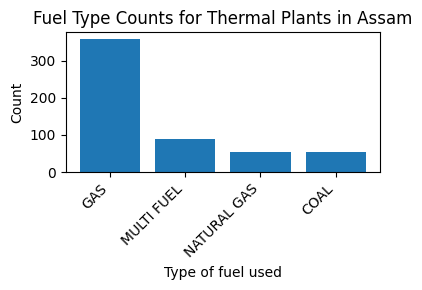

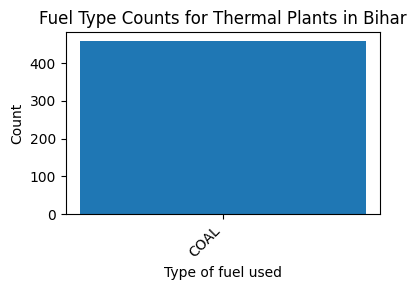

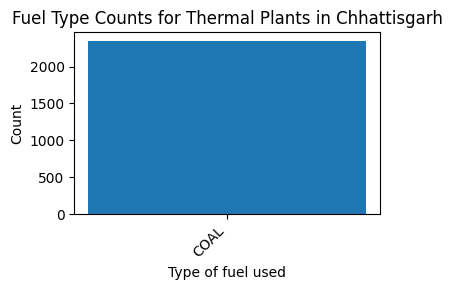

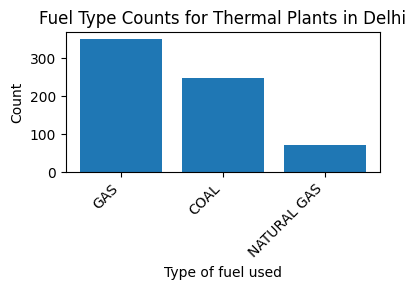

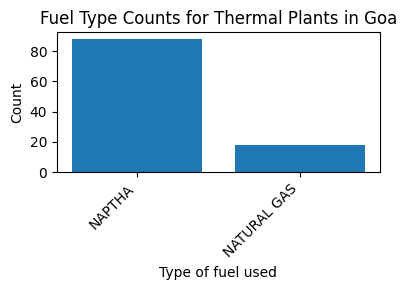

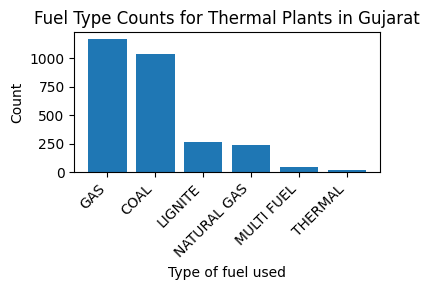

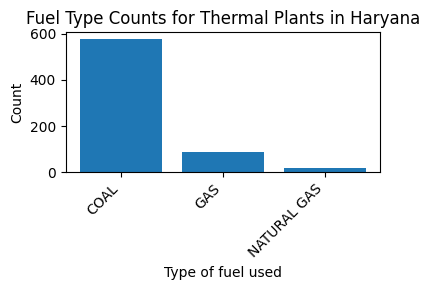

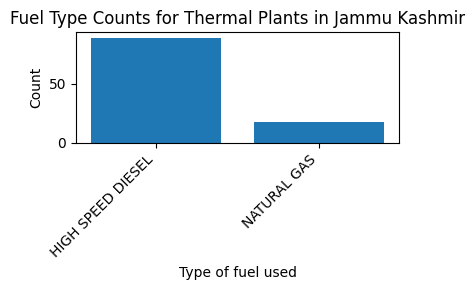

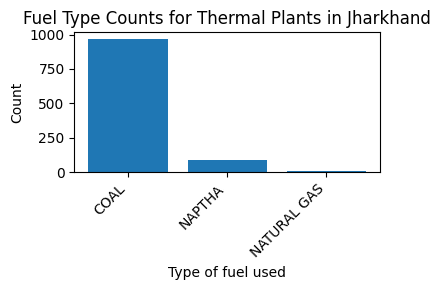

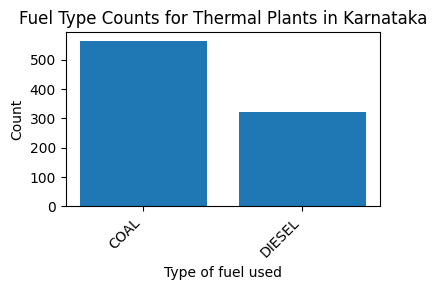

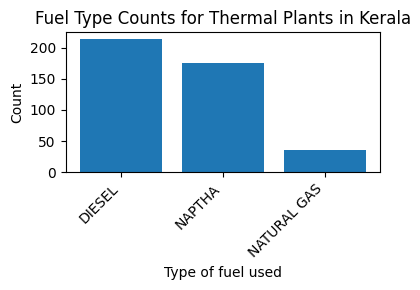

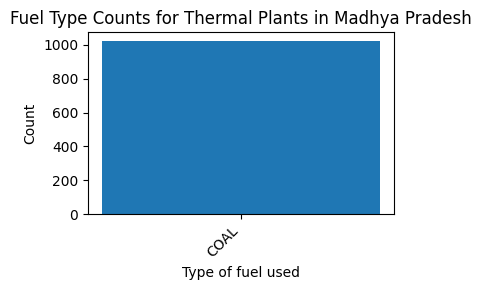

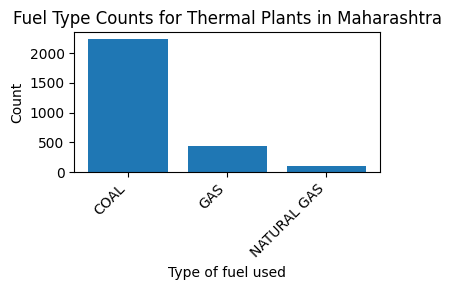

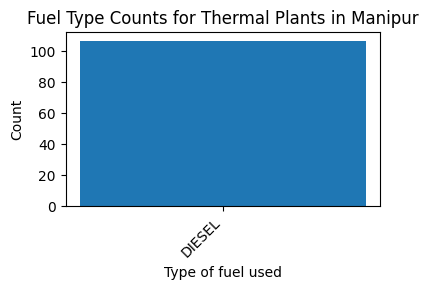

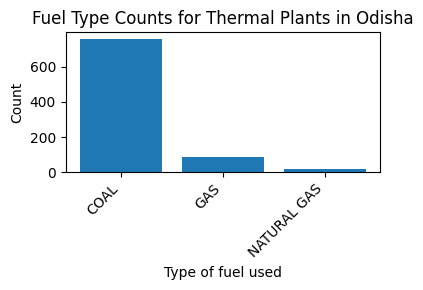

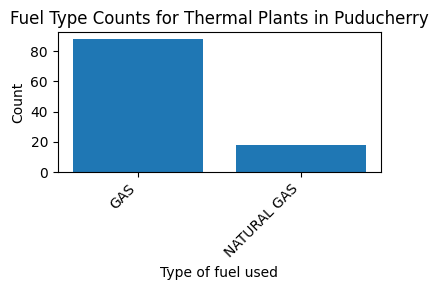

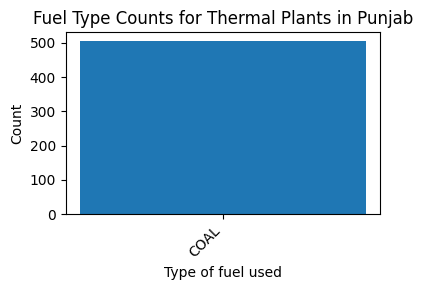

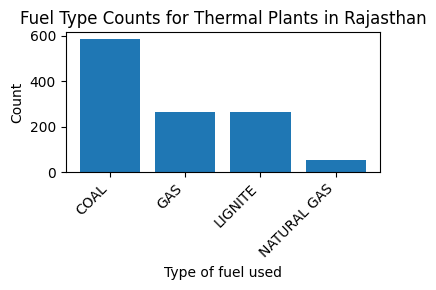

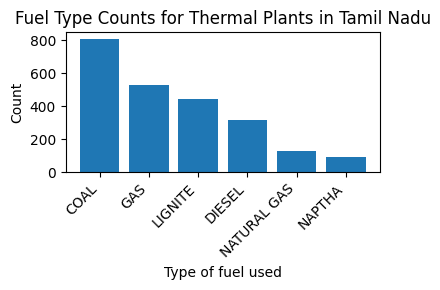

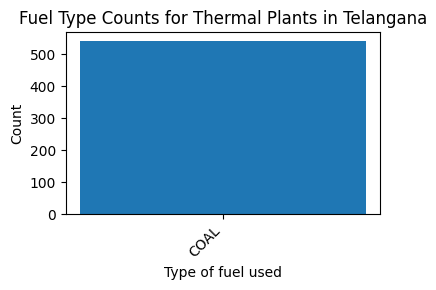

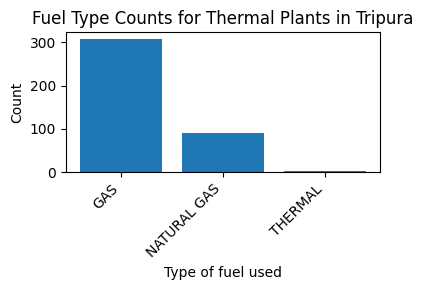

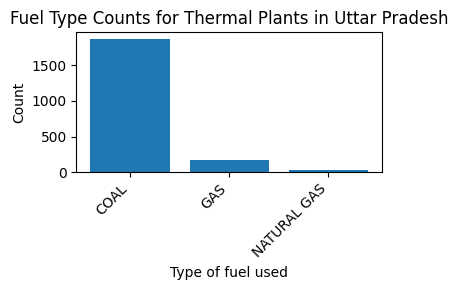

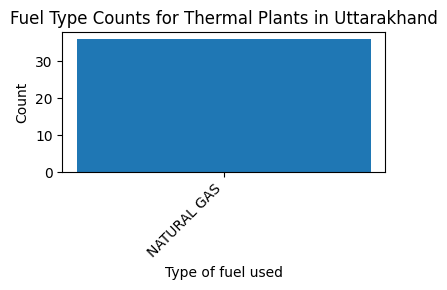

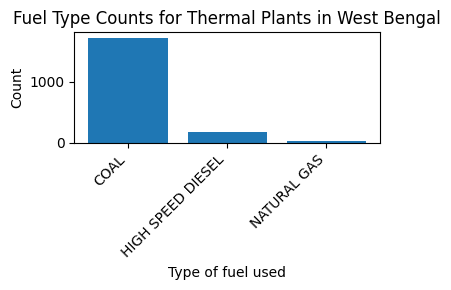

In [ ]:
for state in fuel_counts_3.index.levels[0]:
    categories = fuel_counts_3[state].index
    counts =fuel_counts_3[state].values


    plt.figure(figsize=(4, 3))
    plt.bar(categories, counts)


    plt.xlabel('Type of fuel used')
    plt.ylabel('Count')
    plt.title(f'Fuel Type Counts for Thermal Plants in {state}')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

## (g)Is there a correlation between the sector of power plants (public/private) and their operational efficiency or capacity utilization rates?

In [ ]:
df2['Sector of power plant'].value_counts()

Sector of power plant
STATE          23615
CENTRAL         9819
PRIVATE IPP     9257
PVT             2449
PRIVATE         1246
Name: count, dtype: int64

In [ ]:
df_temp=df2[['Sector of power plant','Actual energy generated(MW)','Installed Capacity']]

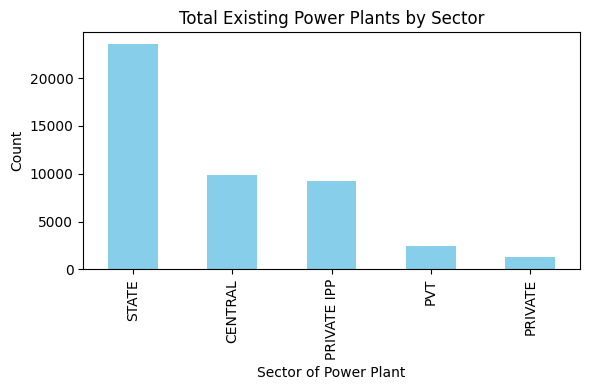

In [ ]:
sector_counts = df_temp['Sector of power plant'].value_counts()
plt.figure(figsize=(6, 4))
sector_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Sector of Power Plant')
plt.ylabel('Count')
plt.title('Total Existing Power Plants by Sector')
plt.tight_layout()
plt.show()

In [ ]:
df_temp['Difference']=df_temp['Installed Capacity']-df_temp['Actual energy generated(MW)']

<ipython-input-195-4b692c7c5469>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Difference']=df_temp['Installed Capacity']-df_temp['Actual energy generated(MW)']


In [ ]:
df_temp_2=df_temp[df_temp.Difference<0]

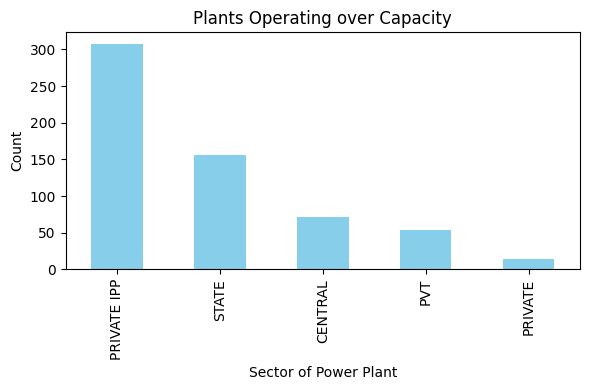

In [ ]:
sector_counts = df_temp_2['Sector of power plant'].value_counts()
plt.figure(figsize=(6, 4))
sector_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Sector of Power Plant')
plt.ylabel('Count')
plt.title('Plants Operating over Capacity')
plt.tight_layout()
plt.show()

In [ ]:
df_temp_3=df_temp[df_temp.Difference>=0]
# df_temp_3.head()

In [ ]:
Check=df_temp_3.groupby('Sector of power plant')['Actual energy generated(MW)'].sum().reset_index()

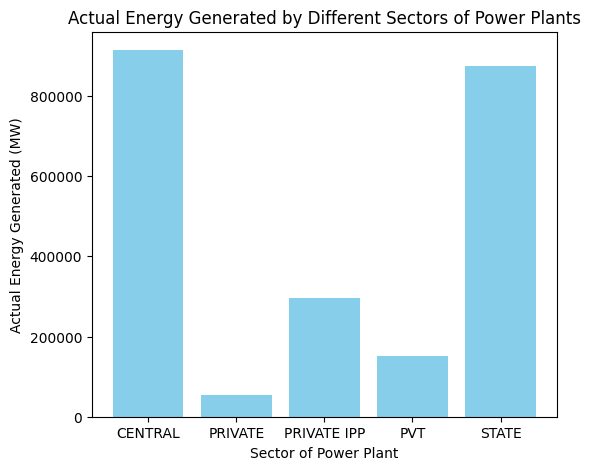

In [ ]:
plt.figure(figsize=(6, 5))
plt.bar(Check['Sector of power plant'], Check['Actual energy generated(MW)'], color='skyblue')


plt.xlabel('Sector of Power Plant')
plt.ylabel('Actual Energy Generated (MW)')
plt.title('Actual Energy Generated by Different Sectors of Power Plants')
plt.show()


## (h)What is the distribution of Sectors among States

In [ ]:
df5=df2[['Sector of power plant','State','Region','Actual energy generated(MW)']]

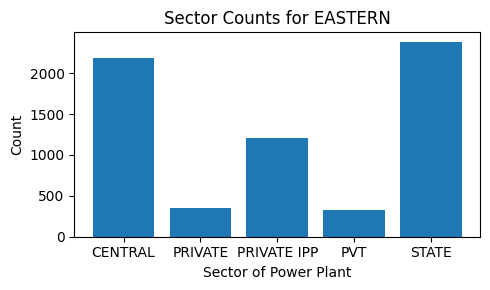

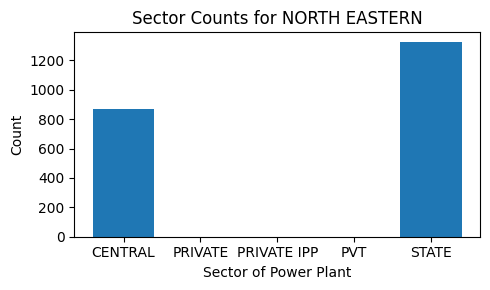

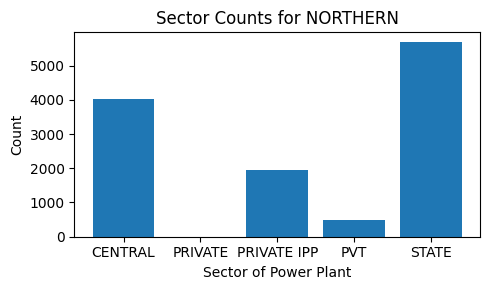

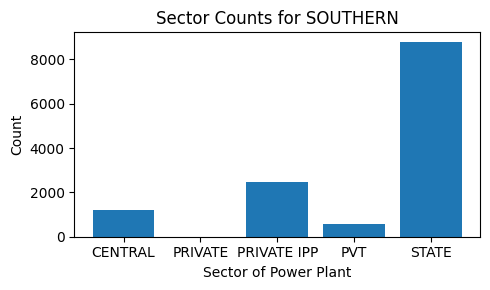

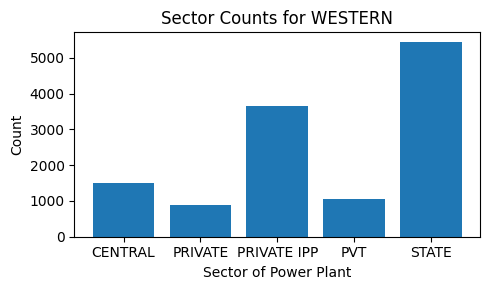

In [ ]:


df5_temp = df5.groupby(['Region', 'Sector of power plant']).size().unstack(fill_value=0)

for state in df5_temp.index:
    categories = df5_temp.columns
    counts = df5_temp.loc[state]


    plt.figure(figsize=(5, 3))
    plt.bar(categories, counts)


    plt.xlabel('Sector of Power Plant')
    plt.ylabel('Count')
    plt.title(f'Sector Counts for {state}')
    # plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()


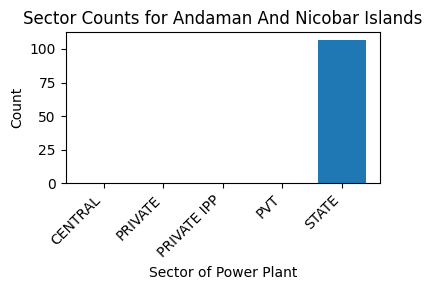

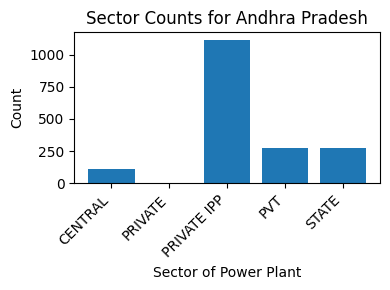

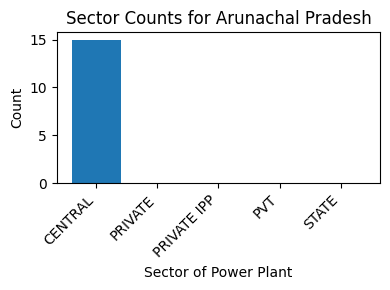

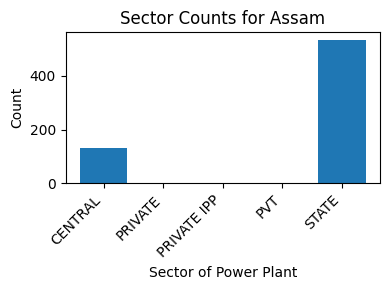

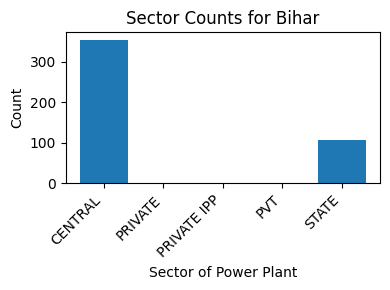

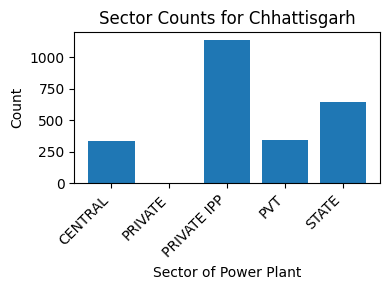

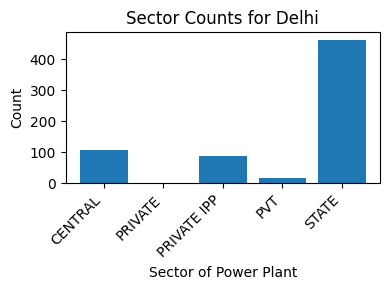

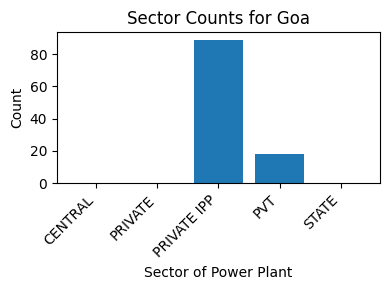

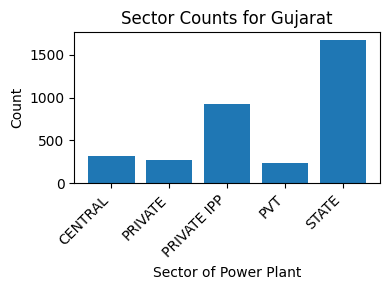

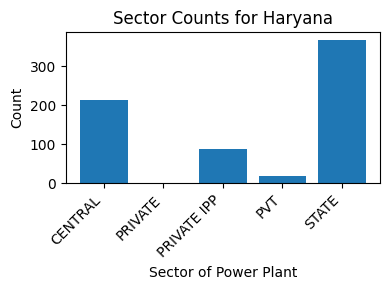

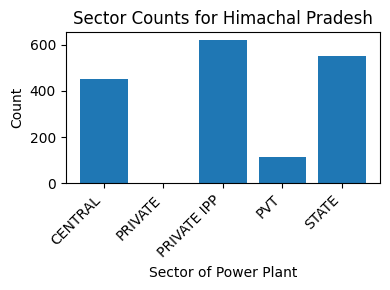

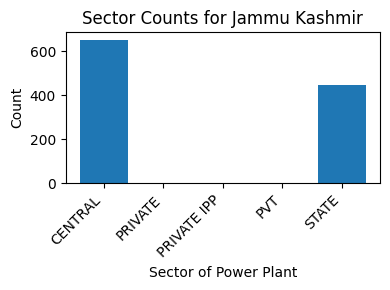

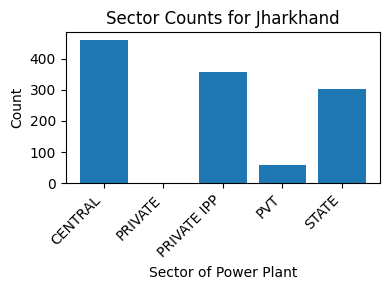

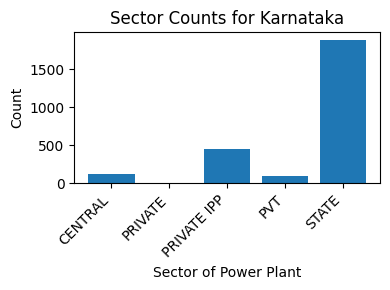

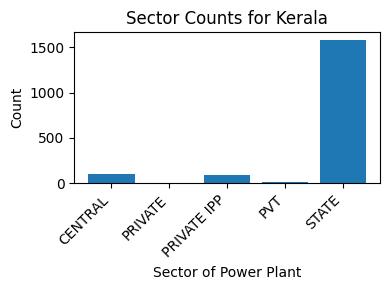

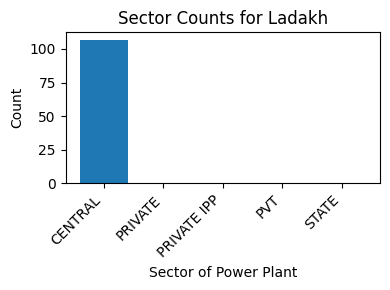

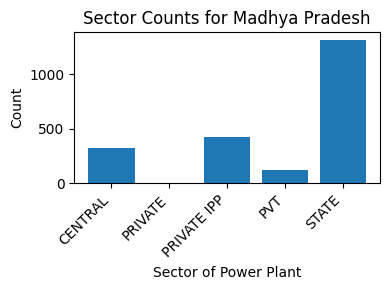

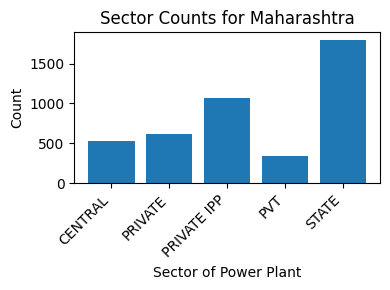

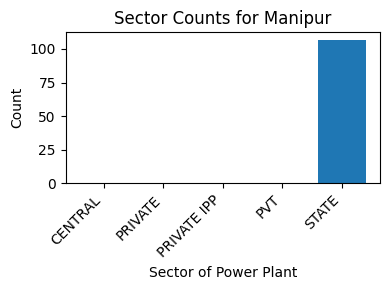

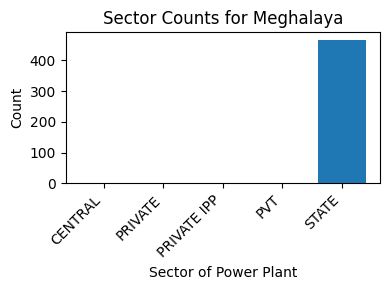

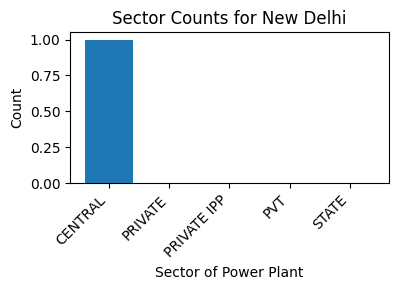

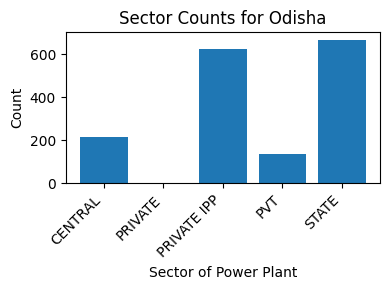

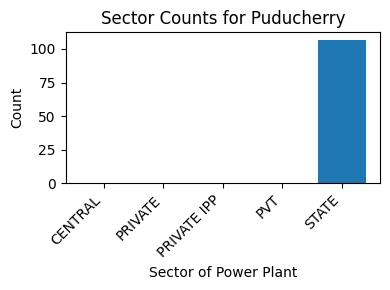

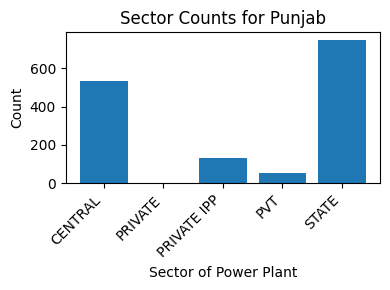

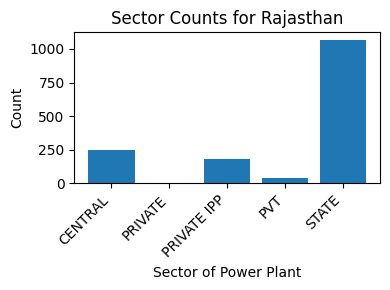

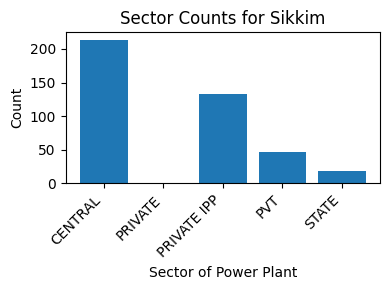

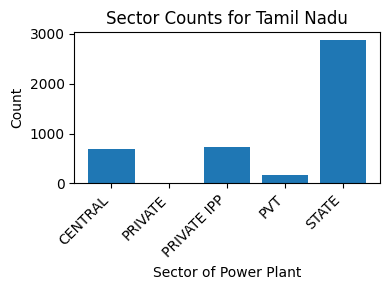

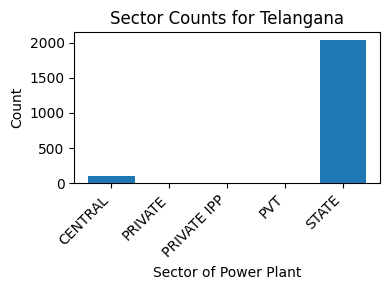

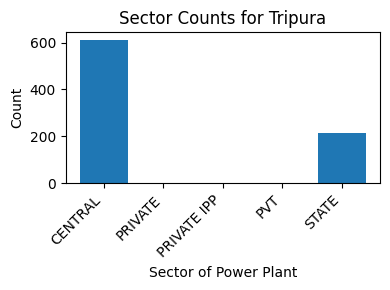

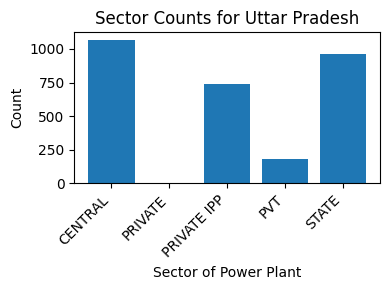

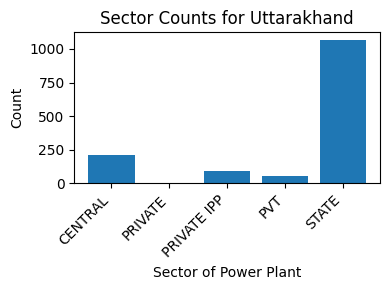

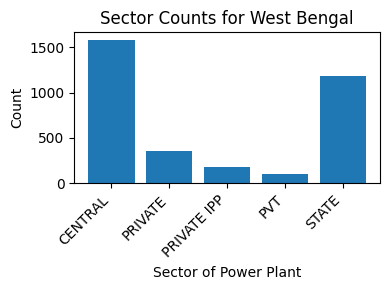

Maximum count in 'CENTRAL' sector is 1584 in 'West Bengal' state.
Maximum count in 'PRIVATE' sector is 623 in 'Maharashtra' state.
Maximum count in 'PRIVATE IPP' sector is 1141 in 'Chhattisgarh' state.
Maximum count in 'PVT' sector is 348 in 'Maharashtra' state.
Maximum count in 'STATE' sector is 2889 in 'Tamil Nadu' state.


In [ ]:


df5_temp = df5.groupby(['State', 'Sector of power plant']).size().unstack(fill_value=0)


for state in df5_temp.index:
    categories = df5_temp.columns
    counts = df5_temp.loc[state]


    plt.figure(figsize=(4, 3))
    plt.bar(categories, counts)

    plt.xlabel('Sector of Power Plant')
    plt.ylabel('Count')
    plt.title(f'Sector Counts for {state}')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()

    plt.show()

    # Find and print max count in each sector and corresponding state
for sector in categories:
    max_count = df5_temp[sector].max()
    corresponding_state = df5_temp.index[df5_temp[sector] == max_count][0]
    print(f"Maximum count in '{sector}' sector is {max_count} in '{corresponding_state}' state.")



## (i) THE CEA

In [ ]:
df2['Generation Programme is prepared by CEA(MW)']=1000*df2['Generation Programme is prepared by CEA']/3600

In [ ]:
df6=df2.copy()
df6['Difference']=df6['Installed Capacity']-df6['Actual energy generated']
df6=df6[df6.Difference>=0]

<ipython-input-210-f2604e1cda4e>:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=45, ha='right')
<ipython-input-210-f2604e1cda4e>:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=45, ha='right')
<ipython-input-210-f2604e1cda4e>:75: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=45, ha='right')
<ipython-input-210-f2604e1cda4e>:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=45, ha='right')


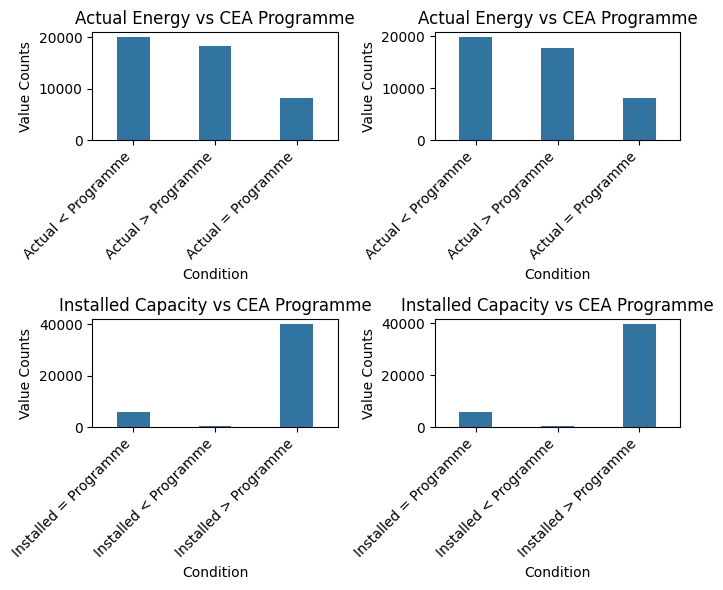

In [ ]:



mask1_df2 = df2['Actual energy generated(MW)'] < df2['Generation Programme is prepared by CEA(MW)']
mask2_df2 = df2['Actual energy generated(MW)'] > df2['Generation Programme is prepared by CEA(MW)']
mask3_df2 = df2['Actual energy generated(MW)'] == df2['Generation Programme is prepared by CEA(MW)']

mask4_df2 = df2['Installed Capacity'] == df2['Generation Programme is prepared by CEA(MW)']
mask5_df2 = df2['Installed Capacity'] < df2['Generation Programme is prepared by CEA(MW)']
mask6_df2 = df2['Installed Capacity'] > df2['Generation Programme is prepared by CEA(MW)']
less_than_actual_df2 = mask1_df2.sum()
greater_than_actual_df2 = mask2_df2.sum()
equal_actual_df2 = mask3_df2.sum()

equal_installed_df2 = mask4_df2.sum()
less_than_installed_df2 = mask5_df2.sum()
greater_than_installed_df2 = mask6_df2.sum()


data1_df2 = pd.DataFrame({
    'Condition': ['Actual < Programme', 'Actual > Programme', 'Actual = Programme'],
    'Count': [less_than_actual_df2, greater_than_actual_df2, equal_actual_df2]
})

data2_df2 = pd.DataFrame({
    'Condition': ['Installed = Programme', 'Installed < Programme', 'Installed > Programme'],
    'Count': [equal_installed_df2, less_than_installed_df2, greater_than_installed_df2]
})

mask1_df6 = df6['Actual energy generated(MW)'] < df6['Generation Programme is prepared by CEA(MW)']
mask2_df6 = df6['Actual energy generated(MW)'] > df6['Generation Programme is prepared by CEA(MW)']
mask3_df6 = df6['Actual energy generated(MW)'] == df6['Generation Programme is prepared by CEA(MW)']

mask4_df6 = df6['Installed Capacity'] == df6['Generation Programme is prepared by CEA(MW)']
mask5_df6 = df6['Installed Capacity'] < df6['Generation Programme is prepared by CEA(MW)']
mask6_df6 = df6['Installed Capacity'] > df6['Generation Programme is prepared by CEA(MW)']

less_than_actual_df6 = mask1_df6.sum()
greater_than_actual_df6 = mask2_df6.sum()
equal_actual_df6 = mask3_df6.sum()

equal_installed_df6 = mask4_df6.sum()
less_than_installed_df6 = mask5_df6.sum()
greater_than_installed_df6 = mask6_df6.sum()


data1_df6 = pd.DataFrame({
    'Condition': ['Actual < Programme', 'Actual > Programme', 'Actual = Programme'],
    'Count': [less_than_actual_df6, greater_than_actual_df6, equal_actual_df6]
})

data2_df6 = pd.DataFrame({
    'Condition': ['Installed = Programme', 'Installed < Programme', 'Installed > Programme'],
    'Count': [equal_installed_df6, less_than_installed_df6, greater_than_installed_df6]
})

# Plotting

fig, axs = plt.subplots(2, 2, figsize=(7, 6))
# Plot 1: Actual energy generated vs Generation Programme for df2
sns.barplot(x='Condition', y='Count', data=data1_df2, ax=axs[0, 0], width=0.4)
axs[0, 0].set_title('Actual Energy vs CEA Programme')
axs[0, 0].set_xlabel('Condition')
axs[0, 0].set_ylabel('Value Counts')
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=45, ha='right')
# Plot 2: Actual energy generated vs Generation Programme for df6
sns.barplot(x='Condition', y='Count', data=data1_df6, ax=axs[0, 1], width=0.4)
axs[0, 1].set_title('Actual Energy vs CEA Programme')
axs[0, 1].set_xlabel('Condition')
axs[0, 1].set_ylabel('Value Counts')
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=45, ha='right')

# Plot 3: Installed Capacity vs Generation Programme for df2
sns.barplot(x='Condition', y='Count', data=data2_df2, ax=axs[1, 0], width=0.4)
axs[1, 0].set_title('Installed Capacity vs CEA Programme')
axs[1, 0].set_xlabel('Condition')
axs[1, 0].set_ylabel('Value Counts')
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=45, ha='right')
# Plot 4: Installed Capacity vs Generation Programme for df6
sns.barplot(x='Condition', y='Count', data=data2_df6, ax=axs[1, 1], width=0.4)
axs[1, 1].set_title('Installed Capacity vs CEA Programme')
axs[1, 1].set_xlabel('Condition')
axs[1, 1].set_ylabel('Value Counts')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [ ]:
print(" Actual < Programme:", less_than_actual_df6)
print(" Actual > Programme:", greater_than_actual_df6)
print(" Actual = Programme:", equal_actual_df6)

print(" Installed = Programme:", equal_installed_df6)
print(" Installed < Programme:", less_than_installed_df6)
print(" Installed > Programme:", greater_than_installed_df6)


print(" Actual < Programme:", less_than_actual_df2)
print(" Actual > Programme:", greater_than_actual_df2)
print(" Actual = Programme:", equal_actual_df2)

print(" Installed = Programme:", equal_installed_df2)
print(" Installed < Programme:", less_than_installed_df2)
print(" Installed > Programme:", greater_than_installed_df2)

 Actual < Programme: 19763
 Actual > Programme: 17780
 Actual = Programme: 8192
 Installed = Programme: 5776
 Installed < Programme: 420
 Installed > Programme: 39539
 Actual < Programme: 19915
 Actual > Programme: 18278
 Actual = Programme: 8193
 Installed = Programme: 5812
 Installed < Programme: 735
 Installed > Programme: 39839


## (j) Plant Wise Distribution Of Those Operating Above Capacity

In [ ]:

df20=df2.copy()

In [ ]:
df20.shape

(46386, 22)

In [ ]:
df20['Difference']=df20['Installed Capacity']-df20['Actual energy generated(MW)']
df2['Difference']=df2['Installed Capacity']-df2['Actual energy generated(MW)']


In [ ]:
danger=df20[df20.Difference<0].value_counts()
Good=df20[df20.Difference==0].value_counts()
Improve=df20[df20.Difference>0].value_counts()
danger_sum=danger.sum()
Good_sum=Good.sum()
Improve_sum=Improve.sum()

In [ ]:
df20['Category']=df20['Category of Plant']

<ipython-input-217-b8f3d8607fac>:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


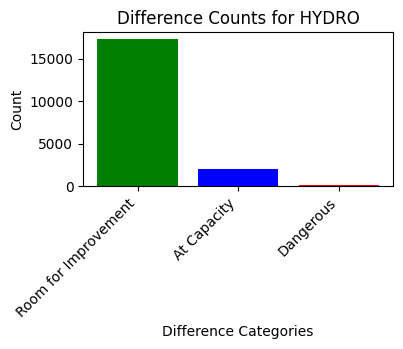

[17246, 1967, 116]


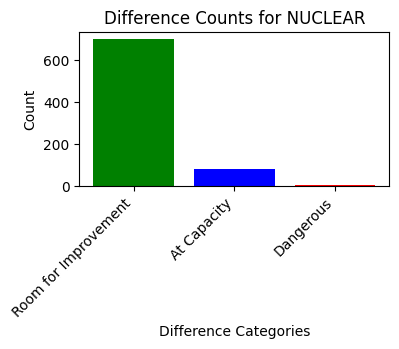

[697, 80, 6]


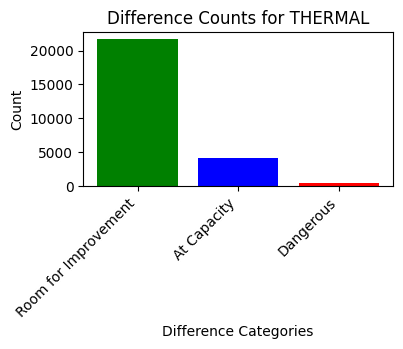

[21644, 4149, 481]


In [ ]:


df10 = pd.DataFrame({
    'Category': df20.Category,
    'Difference': df20.Difference,
})


plant_counts = df10.groupby(['Category', 'Difference']).size().unstack(fill_value=0)


for state in plant_counts.index:
    categories = ['Room for Improvement', 'At Capacity', 'Dangerous']
    counts = [
        plant_counts.loc[state][plant_counts.columns > 0].sum(),
        plant_counts.loc[state][plant_counts.columns == 0].sum(),
        plant_counts.loc[state][plant_counts.columns < 0].sum()
    ]

    plt.figure(figsize=(4, 2))
    plt.bar(categories, counts, color=['green', 'blue', 'red'])


    plt.xlabel('Difference Categories')
    plt.ylabel('Count')
    plt.title(f'Difference Counts for {state}')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()
    print(counts)

In [ ]:
df2.head()
df_n=df2.copy()

In [ ]:
df_n2=df_n[df_n['Category of Plant']=='NUCLEAR']

In [ ]:
df_n2[df_n2.Difference<0]

ROWID Country  State LGD Code          State  Actual energy generated  \
27935  27936   India               9  Uttar Pradesh                   7065.0   
28673  28674   India              24        Gujarat                  18279.0   
33429  33429   India               9  Uttar Pradesh                  12944.0   
36398  36399   India              29      Karnataka                  30212.0   
36402  36403   India               9  Uttar Pradesh                  20885.0   
42813  42814   India              27    Maharashtra                  37764.0   

      Category of Plant Type of fuel used  Installed Capacity  \
27935           NUCLEAR           NUCLEAR               440.0   
28673           NUCLEAR           NUCLEAR               440.0   
33429           NUCLEAR           NUCLEAR               440.0   
36398           NUCLEAR           NUCLEAR               660.0   
36402           NUCLEAR           NUCLEAR               740.0   
42813           NUCLEAR           NUCLEAR              1400.0   

       Generation Programme is prepared by CEA    Region  ...    Station Name  \
27935                                     84.0  NORTHERN  ...     NARORA  APS   
28673                                     92.0   WESTERN  ...       KAKRAPARA   
33429                                    176.0  SOUTHERN  ...     MADRAS  APS   
36398                                    260.0  SOUTHERN  ...           KAIGA   
36402                                    260.0  NORTHERN  ...  RAJASTHAN  APS   
42813                                    627.0   WESTERN  ...         TARAPUR   

      SourceMonth SourceYear YearCode                             Year  \
27935  Apr - 2008       2008     2008  Calendar Year (Jan - Dec), 2008   
28673  Apr - 2008       2008     2008  Calendar Year (Jan - Dec), 2008   
33429  Apr - 2008       2008     2008  Calendar Year (Jan - Dec), 2008   
36398  Apr - 2008       2008     2008  Calendar Year (Jan - Dec), 2008   
36402  Apr - 2008       2008     2008  Calendar Year (Jan - Dec), 2008   
42813  Apr - 2008       2008     2008  Calendar Year (Jan - Dec), 2008   

       MonthCode        Month Actual energy generated(MW)  \
27935     200804  April, 2008                 1962.500000   
28673     200804  April, 2008                 5077.500000   
33429     200804  April, 2008                 3595.555556   
36398     200804  April, 2008                 8392.222222   
36402     200804  April, 2008                 5801.388889   
42813     200804  April, 2008                10490.000000   

       Generation Programme is prepared by CEA(MW)   Difference  
27935                                    23.333333 -1522.500000  
28673                                    25.555556 -4637.500000  
33429                                    48.888889 -3155.555556  
36398                                    72.222222 -7732.222222  
36402                                    72.222222 -5061.388889  
42813                                   174.166667 -9090.000000  

[6 rows x 23 columns]

## Q3

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

In [ ]:
df=pd.read_csv("Consumer_Dataset.csv")
data=pd.read_csv("Consumer_Dataset.csv")

In [ ]:
df.head()


Unnamed: 0  Gender  Age Ever_Married  Family_Size     Profession Graduated  \
0           0    Male   22           No          4.0     Healthcare        No   
1           1  Female   38          Yes          3.0       Engineer       Yes   
2           2  Female   67          Yes          1.0       Engineer       Yes   
3           3    Male   67          Yes          2.0         Lawyer       Yes   
4           4  Female   40          Yes          6.0  Entertainment       Yes   

   Work_Experience Energy_Consumption Preferred_Renewable Group  
0              1.0                Low               Hydro     D  
1              NaN            Average               Hydro     A  
2              1.0                Low               Solar     B  
3              0.0               High               Solar     B  
4              NaN               High               Solar     A

In [ ]:
# data.Group.value_counts()

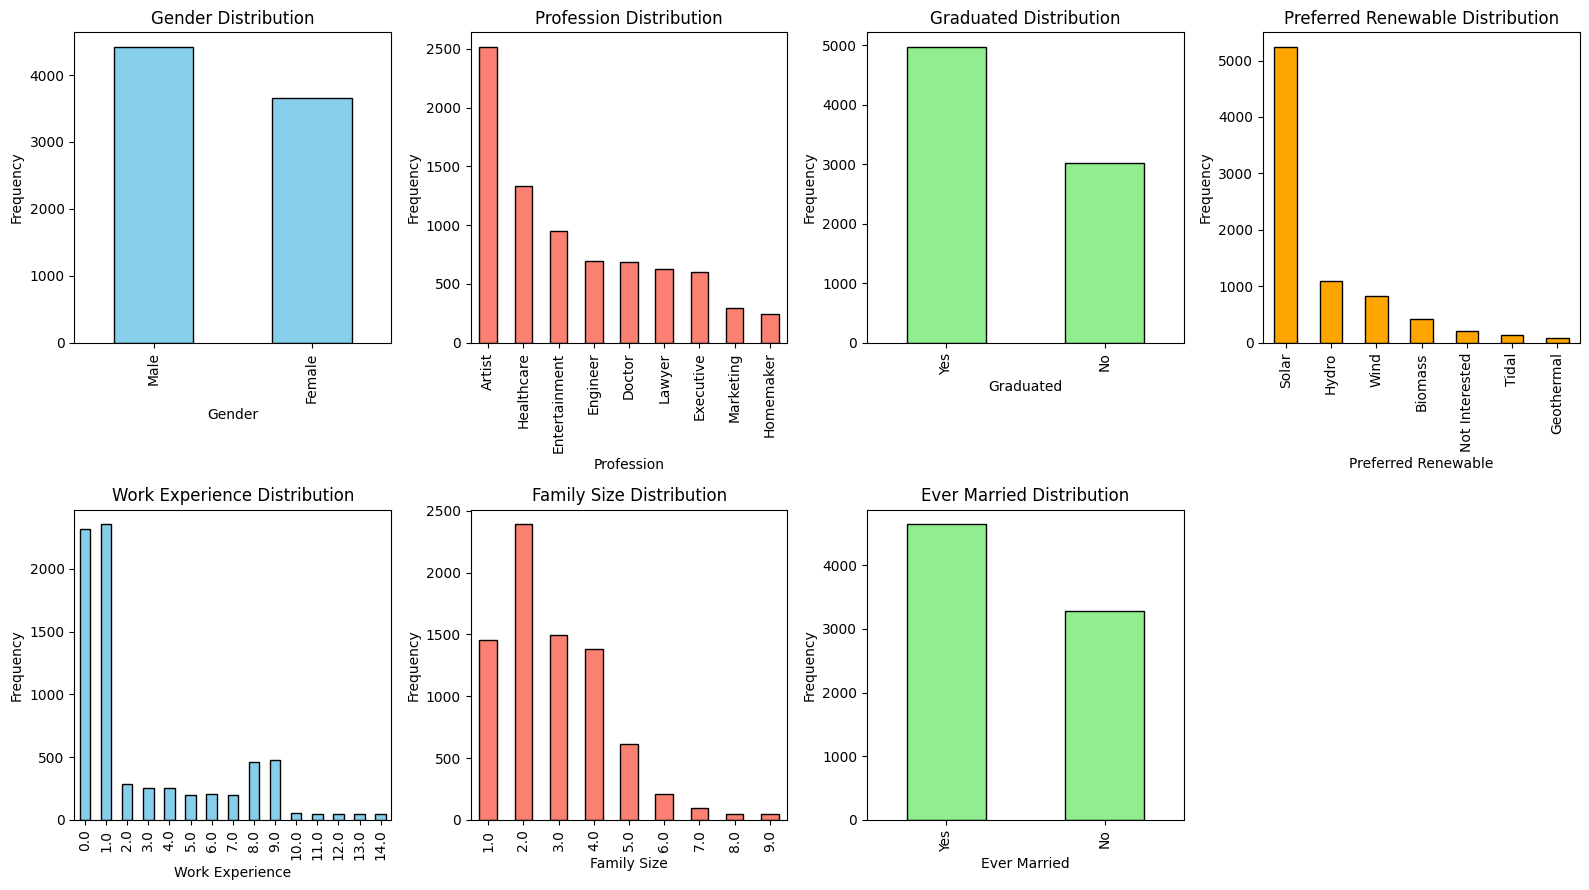

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(16, 9))

# Plot for Gender column
df['Gender'].value_counts().plot(kind='bar', ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title('Gender Distribution')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Frequency')

# Plot for Profession column
df['Profession'].value_counts().plot(kind='bar', ax=axes[0, 1], color='salmon', edgecolor='black')
axes[0, 1].set_title('Profession Distribution')
axes[0, 1].set_xlabel('Profession')
axes[0, 1].set_ylabel('Frequency')

# Plot for Graduated column
df['Graduated'].value_counts().plot(kind='bar', ax=axes[0, 2], color='lightgreen', edgecolor='black')
axes[0, 2].set_title('Graduated Distribution')
axes[0, 2].set_xlabel('Graduated')
axes[0, 2].set_ylabel('Frequency')

# Plot for Preferred_Renewable column
df['Preferred_Renewable'].value_counts().plot(kind='bar', ax=axes[0, 3], color='orange', edgecolor='black')
axes[0, 3].set_title('Preferred Renewable Distribution')
axes[0, 3].set_xlabel('Preferred Renewable')
axes[0, 3].set_ylabel('Frequency')

# Plot for Work_Experience column
df['Work_Experience'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 0], color='skyblue', edgecolor='black')
axes[1, 0].set_title('Work Experience Distribution')
axes[1, 0].set_xlabel('Work Experience')
axes[1, 0].set_ylabel('Frequency')

# Plot for Family_Size column
df['Family_Size'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 1], color='salmon', edgecolor='black')
axes[1, 1].set_title('Family Size Distribution')
axes[1, 1].set_xlabel('Family Size')
axes[1, 1].set_ylabel('Frequency')

# Plot for Ever_Married column
df['Ever_Married'].value_counts().plot(kind='bar', ax=axes[1, 2], color='lightgreen', edgecolor='black')
axes[1, 2].set_title('Ever Married Distribution')
axes[1, 2].set_xlabel('Ever Married')
axes[1, 2].set_ylabel('Frequency')


fig.delaxes(axes[1, 3])

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.impute import SimpleImputer
age_imputer = SimpleImputer(strategy='most_frequent')
df['Age'] = age_imputer.fit_transform(df[['Age']])

# Impute 'Work_Experience' column
work_experience_imputer = SimpleImputer(strategy='most_frequent')
df['Work_Experience'] = work_experience_imputer.fit_transform(df[['Work_Experience']])
imputer=SimpleImputer(strategy='most_frequent')
# Impute 'Family_Size' column
family_size_imputer = SimpleImputer(strategy='most_frequent')
df['Family_Size'] = family_size_imputer.fit_transform(df[['Family_Size']])

df['Gender']=imputer.fit_transform(df[['Gender']]).ravel()
# Impute missing values in 'Profession' column
df['Profession'] = imputer.fit_transform(df[['Profession']]).ravel()
df['Ever_Married'] = imputer.fit_transform(df[['Ever_Married']]).ravel()

# Impute missing values in 'Graduated' column
df['Graduated'] = imputer.fit_transform(df[['Graduated']]).ravel()

# Impute missing values in 'Preferred_Renewable' column
df['Preferred_Renewable'] = imputer.fit_transform(df[['Preferred_Renewable']]).ravel()


In [ ]:
le = LabelEncoder()

# Encode Gender column
df['Gender_Encoded'] = le.fit_transform(df['Gender'])

# Encode Profession column
df['Profession_Encoded'] = le.fit_transform(df['Profession'])
df['Ever_Married_Encoded'] = le.fit_transform(df['Ever_Married'])
df['Graduated_Encoded'] = le.fit_transform(df['Graduated'])
df['Energy_Consumption_Encoded'] = le.fit_transform(df['Energy_Consumption'])
df['Preferred_Renewable_Encoded'] = le.fit_transform(df['Preferred_Renewable'])

In [ ]:
df=df.drop(columns=['Gender','Profession','Unnamed: 0','Ever_Married', 'Graduated', 'Energy_Consumption', 'Preferred_Renewable'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          8068 non-null   int64  
 1   Family_Size                  8068 non-null   float64
 2   Work_Experience              8068 non-null   float64
 3   Group                        8068 non-null   object 
 4   Gender_Encoded               8068 non-null   int64  
 5   Profession_Encoded           8068 non-null   int64  
 6   Ever_Married_Encoded         8068 non-null   int64  
 7   Graduated_Encoded            8068 non-null   int64  
 8   Energy_Consumption_Encoded   8068 non-null   int64  
 9   Preferred_Renewable_Encoded  8068 non-null   int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 630.4+ KB


In [ ]:
label_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
df['Group'] = df['Group'].map(label_mapping)

<Axes: >

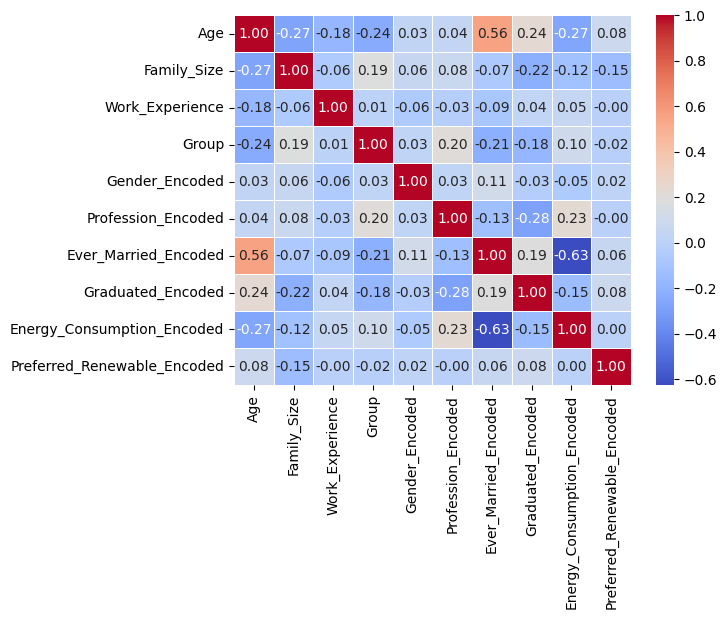

In [ ]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [ ]:
scaler = StandardScaler()

df['Age'] = scaler.fit_transform(df[['Age']])
df['Family_Size'] = scaler.fit_transform(df[['Family_Size']])
df['Work_Experience'] = scaler.fit_transform(df[['Work_Experience']])

In [ ]:
df2=df.copy()

In [ ]:
y=df2['Group']
X=df2.drop(columns='Group',axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models


# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(objective='multi:softmax', num_class=4, random_state=42)  # Example XGBClassifier setup
}

# Parameter grids for GridSearchCV
param_grids = {
    'Decision Tree': {'max_depth': [None, 8, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'Naive Bayes': {},  # No hyperparameters to tune for Naive Bayes
    'XGBoost': {
        'max_depth': [3, 6, 9],
        'learning_rate': [0.1, 0.01],
        'n_estimators': [100, 200],
    }
}

# Perform GridSearchCV and fit models
for model_name, model in models.items():

    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Print best parameters and best score
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy: {grid_search.best_score_:.3f}")

    # Evaluate on test set
    test_accuracy = grid_search.best_estimator_.score(X_test, y_test)
    print(f"Test set accuracy: {test_accuracy:.3f}\n")


Best parameters for Decision Tree: {'max_depth': 8}
Best cross-validation accuracy: 0.505
Test set accuracy: 0.515

Best parameters for Random Forest: {'n_estimators': 100}
Best cross-validation accuracy: 0.494
Test set accuracy: 0.482

Best parameters for Naive Bayes: {}
Best cross-validation accuracy: 0.482
Test set accuracy: 0.475

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best cross-validation accuracy: 0.533
Test set accuracy: 0.533



In [ ]:
test_df=pd.read_csv("Consumer Test Dataset.csv")
test_df_2=pd.read_csv("Consumer Test Dataset.csv")

In [ ]:
# test_df_2.info()

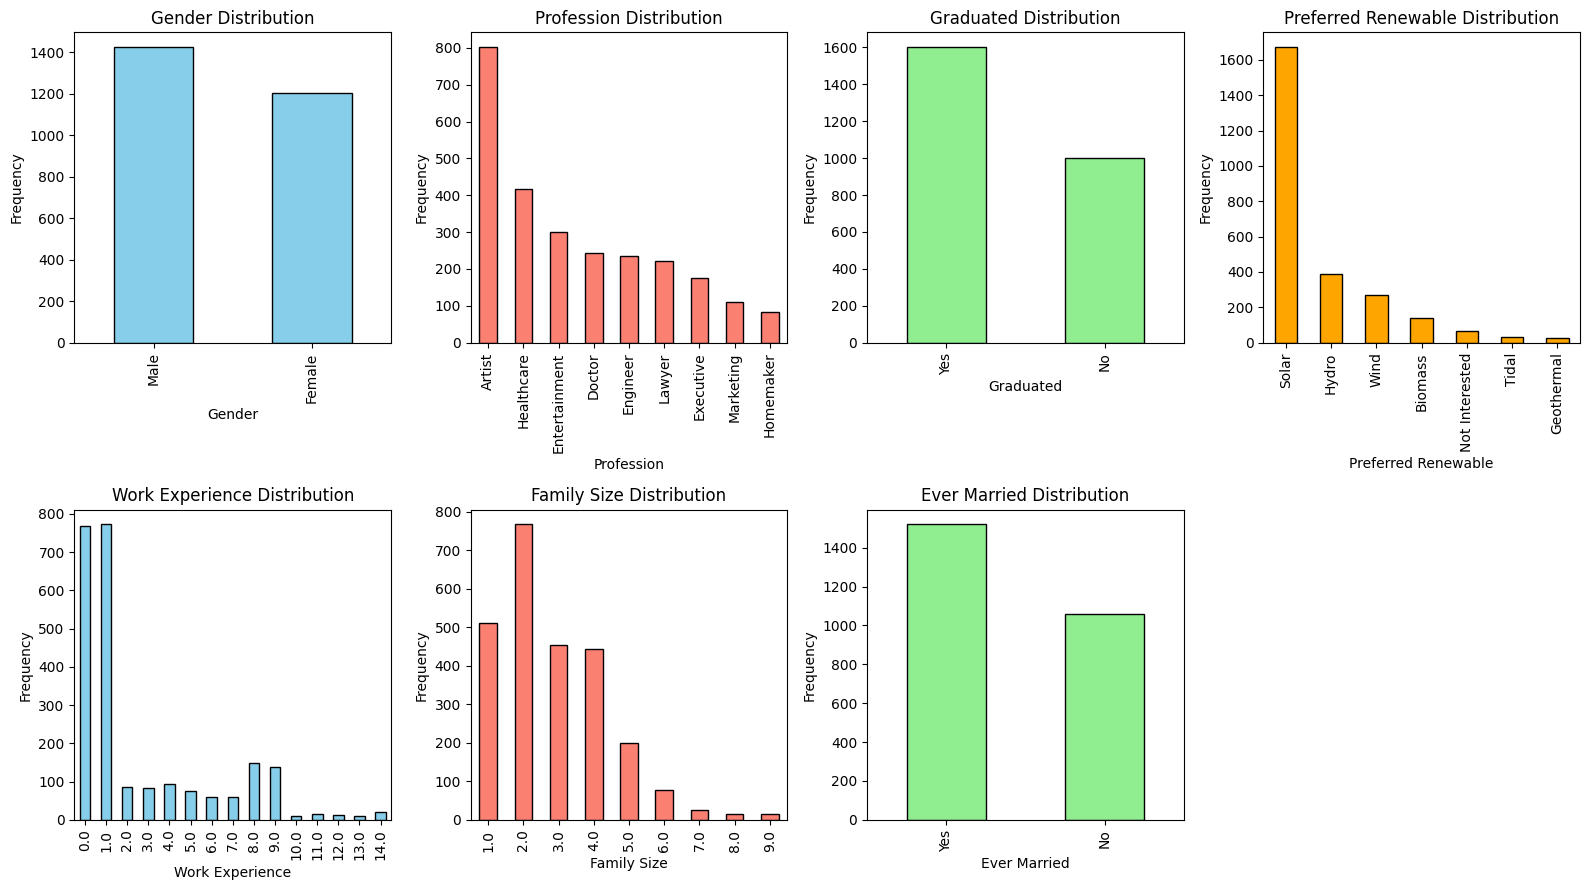

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(16, 9))

# Plot for Gender column
test_df['Gender'].value_counts().plot(kind='bar', ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title('Gender Distribution')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Frequency')

# Plot for Profession column
test_df['Profession'].value_counts().plot(kind='bar', ax=axes[0, 1], color='salmon', edgecolor='black')
axes[0, 1].set_title('Profession Distribution')
axes[0, 1].set_xlabel('Profession')
axes[0, 1].set_ylabel('Frequency')

# Plot for Graduated column
test_df['Graduated'].value_counts().plot(kind='bar', ax=axes[0, 2], color='lightgreen', edgecolor='black')
axes[0, 2].set_title('Graduated Distribution')
axes[0, 2].set_xlabel('Graduated')
axes[0, 2].set_ylabel('Frequency')

# Plot for Preferred_Renewable column
test_df['Preferred_Renewable'].value_counts().plot(kind='bar', ax=axes[0, 3], color='orange', edgecolor='black')
axes[0, 3].set_title('Preferred Renewable Distribution')
axes[0, 3].set_xlabel('Preferred Renewable')
axes[0, 3].set_ylabel('Frequency')

# Plot for Work_Experience column
test_df['Work_Experience'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 0], color='skyblue', edgecolor='black')
axes[1, 0].set_title('Work Experience Distribution')
axes[1, 0].set_xlabel('Work Experience')
axes[1, 0].set_ylabel('Frequency')

# Plot for Family_Size column
test_df['Family_Size'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 1], color='salmon', edgecolor='black')
axes[1, 1].set_title('Family Size Distribution')
axes[1, 1].set_xlabel('Family Size')
axes[1, 1].set_ylabel('Frequency')

# Plot for Ever_Married column
test_df['Ever_Married'].value_counts().plot(kind='bar', ax=axes[1, 2], color='lightgreen', edgecolor='black')
axes[1, 2].set_title('Ever Married Distribution')
axes[1, 2].set_xlabel('Ever Married')
axes[1, 2].set_ylabel('Frequency')

# Remove the empty subplot in the last position of the second row
fig.delaxes(axes[1, 3])

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.impute import SimpleImputer
age_imputer = SimpleImputer(strategy='most_frequent')
test_df['Age'] = age_imputer.fit_transform(test_df[['Age']])

work_experience_imputer = SimpleImputer(strategy='most_frequent')
test_df['Work_Experience'] = work_experience_imputer.fit_transform(test_df[['Work_Experience']])
imputer=SimpleImputer(strategy='most_frequent')

family_size_imputer = SimpleImputer(strategy='most_frequent')
test_df['Family_Size'] = family_size_imputer.fit_transform(test_df[['Family_Size']])

test_df['Gender']=imputer.fit_transform(test_df[['Gender']]).ravel()

test_df['Profession'] = imputer.fit_transform(test_df[['Profession']]).ravel()


test_df['Graduated'] = imputer.fit_transform(test_df[['Graduated']]).ravel()


test_df['Preferred_Renewable'] = imputer.fit_transform(test_df[['Preferred_Renewable']]).ravel()


In [ ]:
le = LabelEncoder()

# Encode Gender column
test_df['Gender_Encoded'] = le.fit_transform(test_df['Gender'])

# Encode Profession column
test_df['Profession_Encoded'] = le.fit_transform(test_df['Profession'])

# Encode Ever_Married column
test_df['Ever_Married_Encoded'] = le.fit_transform(test_df['Ever_Married'])

# Encode Graduated column
test_df['Graduated_Encoded'] = le.fit_transform(test_df['Graduated'])

# Encode Energy_Consumption column
test_df['Energy_Consumption_Encoded'] = le.fit_transform(test_df['Energy_Consumption'])

# Encode Preferred_Renewable column
test_df['Preferred_Renewable_Encoded'] = le.fit_transform(test_df['Preferred_Renewable'])

In [ ]:
test_df_4=test_df.drop(columns=['Gender','Profession','Unnamed: 0','Ever_Married', 'Graduated', 'Energy_Consumption', 'Preferred_Renewable'],axis=1)

In [ ]:
test_df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          2627 non-null   int64  
 1   Family_Size                  2627 non-null   float64
 2   Work_Experience              2627 non-null   float64
 3   Gender_Encoded               2627 non-null   int64  
 4   Profession_Encoded           2627 non-null   int64  
 5   Ever_Married_Encoded         2627 non-null   int64  
 6   Graduated_Encoded            2627 non-null   int64  
 7   Energy_Consumption_Encoded   2627 non-null   int64  
 8   Preferred_Renewable_Encoded  2627 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 184.8 KB


In [ ]:
scaler = StandardScaler()

df['Age'] = scaler.fit_transform(df[['Age']])
df['Family_Size'] = scaler.fit_transform(df[['Family_Size']])
df['Work_Experience'] = scaler.fit_transform(df[['Work_Experience']])

In [ ]:
best_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

# Initialize and train the best XGBoost model
best_model = XGBClassifier(**best_params)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Best model parameters
best_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

# Initialize and train the best XGBoost model
best_model = XGBClassifier(**best_params)
best_model.fit(X_train, y_train)


# Make predictions on the test data
predictions = best_model.predict(test_df_4)
label_mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}
mapped_predictions = [label_mapping[label] for label in predictions]

# Create a DataFrame to save predictions
predictions_df = pd.DataFrame(mapped_predictions, columns=['Predicted'])

In [ ]:
predictions_df.shape

(2627, 1)

In [ ]:
predictions_file_path = 'Predictions_Groups.csv'
predictions_df.to_csv(predictions_file_path, index=False)

In [ ]:
predictions_df.value_counts()
mean_variance = predictions_df.groupby('Predicted').size().agg(['mean', 'var'])

print("Mean and Variance of groups formed by XGBoost:")
print(mean_variance)

Mean and Variance of groups formed by XGBoost:
mean       656.75
var     367514.25
dtype: float64


## Q5 Bonus

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans


file_path = 'Consumer Test Dataset.csv'
data = pd.read_csv(file_path)


data = data.drop(columns=['Unnamed: 0'])


categorical_cols = ['Gender', 'Ever_Married', 'Profession', 'Graduated', 'Energy_Consumption', 'Preferred_Renewable']
numerical_cols = ['Age', 'Family_Size', 'Work_Experience']

categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = categorical_imputer.fit_transform(data[categorical_cols])


numerical_imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = numerical_imputer.fit_transform(data[numerical_cols])

numerical_data = data[numerical_cols]
categorical_data = data[categorical_cols]

scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(numerical_data)


encoder = OneHotEncoder(handle_unknown='ignore')
encoded_categorical_data = encoder.fit_transform(categorical_data).toarray()

scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_cols)

encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_cols))


preprocessed_data = pd.concat([scaled_numerical_df, encoded_categorical_df], axis=1)


kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(preprocessed_data)


data['Cluster'] = kmeans.labels_




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_column = data[['Cluster']]  # Keeping it as a DataFrame

# Save the 'Cluster' column to a CSV file
cluster_column.to_csv('cluster_column.csv', index=False)

In [ ]:
inertia = kmeans.inertia_
print("Inertia is",inertia)
data['Cluster'].value_counts()





mean_variance = data.groupby('Cluster').size().agg(['mean', 'var'])

print("Mean and Variance of clusters:")
print(mean_variance)

Inertia is 10833.647165246879
Mean and Variance of clusters:
mean      656.750000
var     59184.916667
dtype: float64
